# Titanic: Machine Learning from Disaster

## Description of the Kaggle challenge

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective

Predict survival of the passengers

### Kaggle specification

There is 2 datasets, Train and Test. 
The Test dataset is used for the prediction and therefore do not have Survived feature.

## Table of contents


- [Description of the data set](#Description-of-the-data-set)
- [First look at the data](#First-look-at-the-data)
    - [Import Libraries](#Import-Libraries)
    - [Load Data](#Load-Data)
    - [Brief summaries](#Brief-summaries)
- [Visualization Part 1](#Visualization-Part-1)
    - [Basic insight of the data](#Basic-insight-of-the-data)
    - [Focus on the mean of survival](#Focus-on-the-mean-of-survival)
- [Features engineering](#Features-engineering)
    - [Name](#Name)
    - [Family](#Family)
    - [Family](#Family)
    - [Cabin](#Cabin)
- [Missing Values](#Missing-Values)
    - [Embarked](#Embarked)
    - [Fare](#Fare)
    - [Age with Median](#Age-with-median)
- [Visualization Part 2](#Visualization-Part-2)
    - [Visualization Name](#Visualization-Name)
    - [Visualization Family](#Visualization-Family)
    - [Visualization Deck](#Visualization-Deck)
    - [All features between Training and Testing set](#All-features-between-Training-and-Testing-set)
- [Features Encoding](#Features-Encoding)
    - [Categorial features encoding](#Categorial features encoding)
        - [Label Encoding](#Label-Encoding)
        - [One Hot Encoding](#One-Hot-Encodingn)   
    - [Feature Scalling](#Feature-Scalling)
    - [Data Preparation](#Data-Preparation)
- [Features Importance](#Features-Importance)
    - [Quantitative Features](#Quantitative-Features)
    - [One Hot Encoder](#One-Hot-Encoder)
    - [Features Selection](#Features-Selection)
- [Model Selection](#Model-Selection)
    - [Helper function](#Helper-function)
    - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
    - [Random Forest Classifier](#Random-Forest-Classifier)
    - [SVC](#SVC)
    - [Voting Classifier](#Voting-Classifier)
- [Submission](#Submission)

### Description of the data set

## First look at the data

[[back to top](#Table-of-contents)]

### Import Libraries

In [1]:
# Pandas
import pandas as pd

# Visualization
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

# Scipy
from scipy import stats


# Sklearn

    # General
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score,
                            precision_score, recall_score) 
    # Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier)

# Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Load data

In [2]:
# Load data
df_train=pd.read_csv("Data/Titanic/train.csv")
df_test=pd.read_csv("Data/Titanic/test.csv")

# Get a combined Dataframe 
combined = df_train.append(df_test)
combined.reset_index(inplace=True)

# For visualization
combined.loc[0:890,'Data_set'] = 'Train'
combined.loc[891:,'Data_set'] = 'Test'
combined.loc[0:890,'Train'] = 1
combined.loc[891:,'Train'] = 0
#combined.drop('index',axis=1,inplace=True)

# Get PassengerId for test and targets for training set
targets = df_train.Survived
PassengerId = df_test['PassengerId']

# Helpler function to split combined quickly
def split_train_test(combined):
    
    train = pd.DataFrame()
    test = pd.DataFrame()
    
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test

# Get a look at the first rows
print("Training set")
display(df_train.head())
print("Testing set")
display(df_test.head())

Training set


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Testing set


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Brief summaries

In [33]:
print("----------------------------------Informations for the training set----------------------------------\n")
df_train.info()
print('\nList of Null values \n\n',df_train.isnull().sum())
print("\n----------------------------------Informations for the testing set ----------------------------------\n")
df_test.info()
print('\nList of Null values \n\n',df_test.isnull().sum())

----------------------------------Informations for the training set----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

List of Null values 

 PassengerId    0  
Survived       0  
Pclass         0  
Name           0  
Sex            0  
Age            177
SibSp          0  
Parch          0  
Ticket         0  
Fare           0  
Cabin          687
Embarked       2  
dtype: int64

----------------------------------Informations

Observations:
    - No Survived feature on the testing set
    - Lot of Ages values are missing 
    - Cabin feature is mostly null 
    - Embarked feature has a few missing values
    - Survived and Pclass should be treated as object

In [34]:
# Basic statistical information about quantitative and qualitative features

# Changing the type of Pclass and Survived 
df_train['Pclass']=df_train['Pclass'].astype(object)
df_train['Survived']=df_train['Survived'].astype(object)
df_test['Pclass']=df_test['Pclass'].astype(object)

print("----------------------------------Informations for the training set----------------------------------\n")

# Quantitative
display(df_train.describe())

# Qualitative
display(df_train.describe(include=['object']))

print("----------------------------------Informations for the testing set----------------------------------\n")

# Quantitative
display(df_test.describe())

# Qualitative
display(df_test.describe(include=['object']))

----------------------------------Informations for the training set----------------------------------



,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,2,3,891,2,681,147,3
top,0,3,"Marechal, Mr. Pierre",male,1601,B96 B98,S
freq,549,491,1,577,7,4,644


----------------------------------Informations for the testing set----------------------------------



,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,91,418
unique,3,418,2,363,76,3
top,3,"Wells, Master. Ralph Lester",male,PC 17608,B57 B59 B63 B66,S
freq,218,1,266,5,3,270


Observations:
    - The training and testing set seems well stratified
    
    - Age :  mean ~30 with std ~14 and min : 0.17 (To study)
    - Sibsp and Parch mean  between 0.3 and 0.5 and std around 1
    - Fare : mean ~34 with big std ~50 
        
    - Pclass : top Pclass_3
    - Sex : top male
    - Embarked : top S
    - Ticket and cabin : is not unique

###  Visualization

[[back to top](#Table-of-contents)]

#### Basic insight of the training set

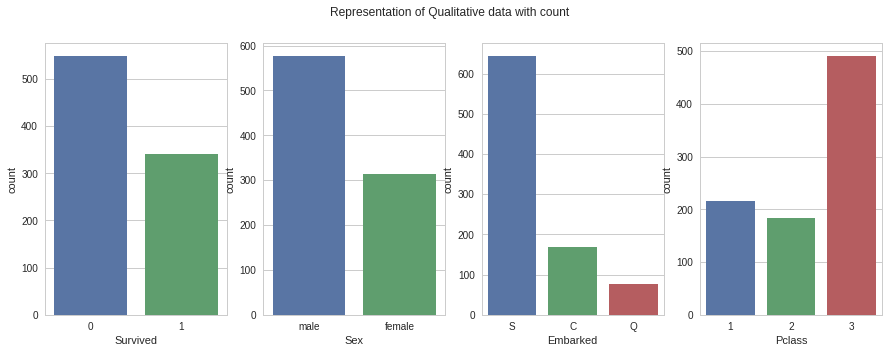

In [37]:
# Qualitative Data : [Survived, Sex, Embarked, Pclass] 
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Survived', data=df_train, ax=axis1)
sns.countplot(x='Sex', data=df_train, ax=axis2)
sns.countplot(x='Embarked', data=df_train, ax=axis3)
sns.countplot(x='Pclass', data=df_train, ax=axis4)
fig.suptitle("Representation of qualitative features with count")

Observations:
    - High imbalance between the values of the Survived, Sex, Plass and Embarked
    - Survived : Mostly 0
    - Sex : Mostly male
    - Pclass : Mostly Pclass3
    - Embarked : Mostly S

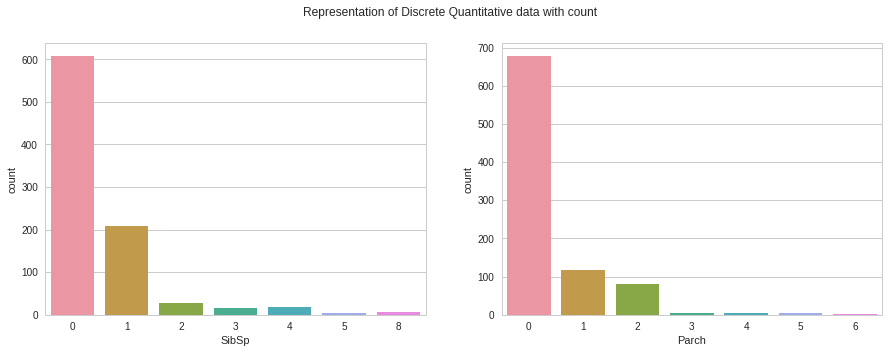

In [38]:
# Discrete Quantitative Data : [SibSp, Parch] 
fig2, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train['SibSp'],ax=axis1)
sns.countplot(df_train['Parch'],ax=axis2)
fig2.suptitle("Representation of discrete quantitative features with count")

Observations:
    - SibSp and Parch mostly 0, with some 1 and 2

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


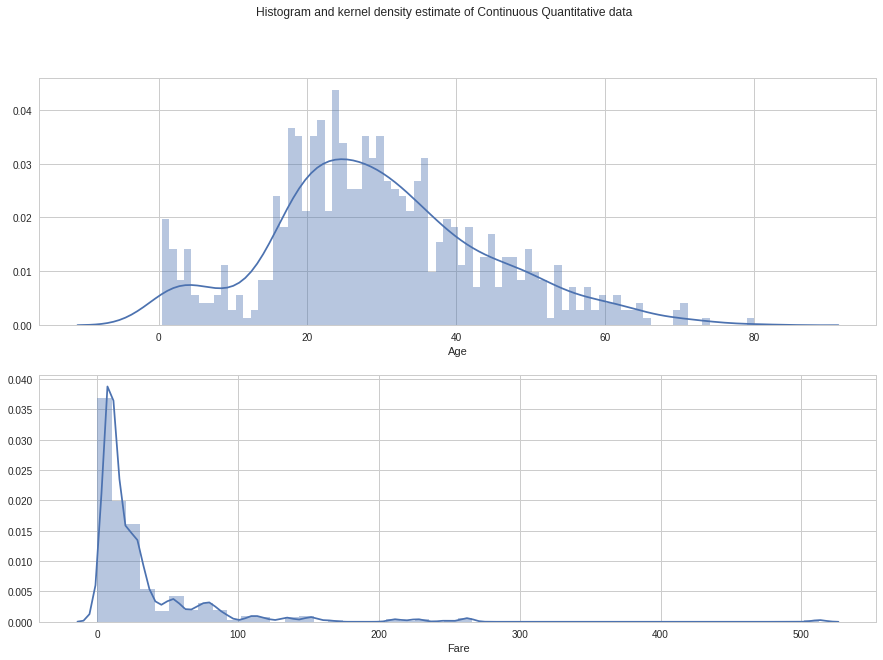

In [39]:
# Continuous Quantitative Data : [Age, Fare]
fig3, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
sns.distplot(df_train['Age'].dropna(), bins=80, ax=axis1)
sns.distplot(df_train['Fare'], ax=axis2)
fig3.suptitle("Histogram and kernel density estimate of dontinuous quantitative features")

Observations:
    - There is a bump representing Child in the Age distribution
    - Fare has a low std compare to the range of values it takes. A few peoples paid way more than the others

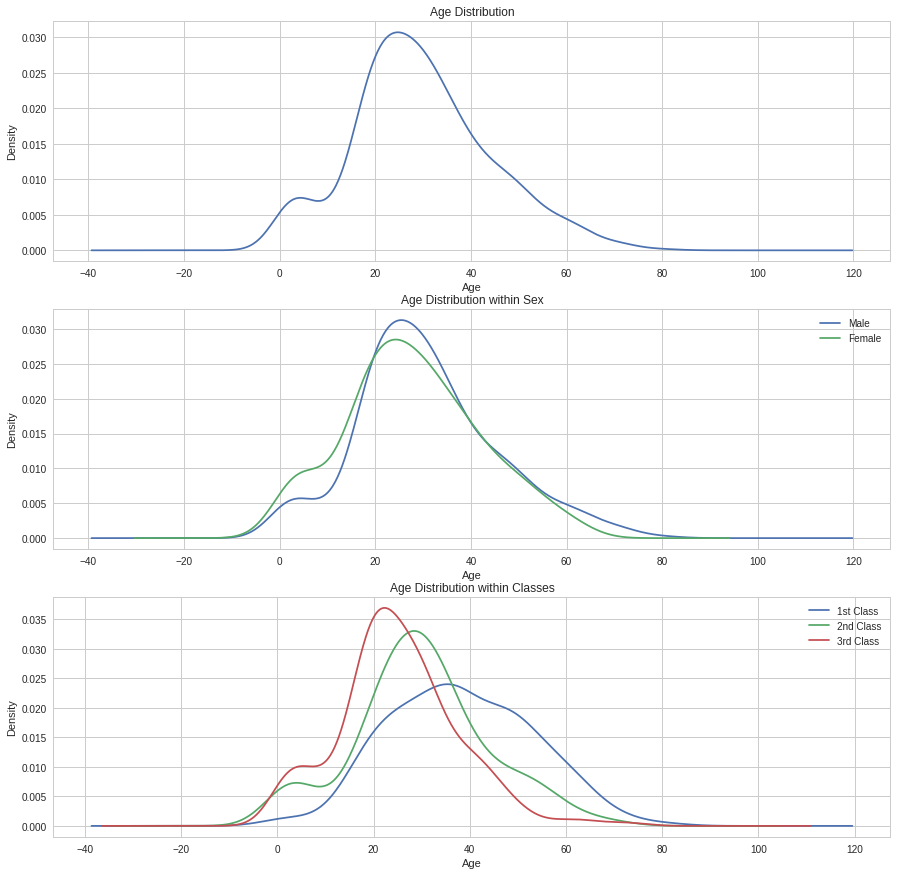

In [40]:
# Age distribution within Sex and Pclass
fig3, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(15,15))

# Age distribution
df_train.Age.plot(kind='kde',ax=axis1)
axis1.set_xlabel("Age")    
axis1.set_title("Age distribution")

# Age distribution within Sex
df_train.Age[df_train.Sex == 'male'].plot(kind='kde',ax=axis2,)    
df_train.Age[df_train.Sex == 'female'].plot(kind='kde',ax=axis2)
axis2.set_xlabel("Age")    
axis2.set_title("Age distribution within Sex")
axis2.legend(('Male', 'Female'))

# Age distribution within Pclass
df_train.Age[df_train.Pclass == 1].plot(kind='kde',ax=axis3)    
df_train.Age[df_train.Pclass == 2].plot(kind='kde',ax=axis3)
df_train.Age[df_train.Pclass == 3].plot(kind='kde',ax=axis3)
axis3.set_xlabel("Age")    
axis3.set_title("Age distribution within PClass")
axis3.legend(('1st Class', '2nd Class','3rd Class'))

Observations:
    - Small difference of distribution of Age between Sex
    - Significant difference of distribution of Age between Pclass

#### Focus on the mean of survival

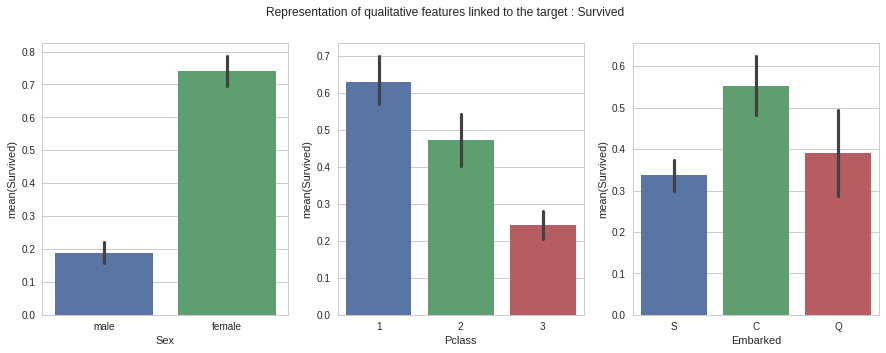

In [47]:
# (Sex, Pclass, Embarked) by mean of survival
fig4, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Sex',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Embarked',y='Survived', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived', data=df_train, ax=axis2)
fig4.suptitle("Representation of qualitative features linked to the target : Survived ")

Observations :
    - Sex :
        - Male : low rate of survival ~0.2
        - Female : high rate of survival ~0.75
    - Pclass : By rate of survival 1 > 2 > 3
    - Embarked : Difference of survival

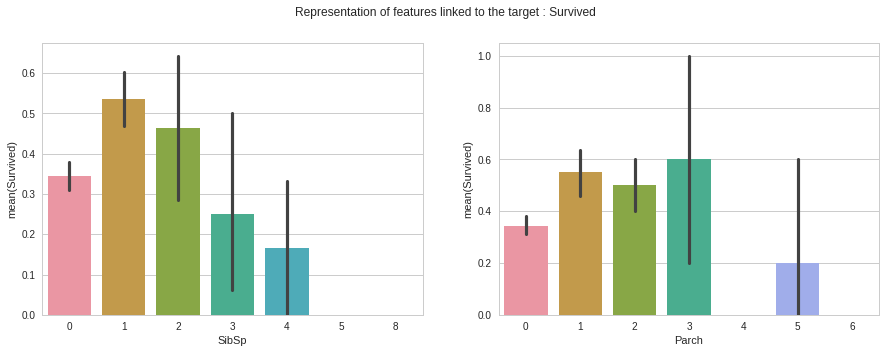

In [42]:
# (SibSp, Parch) by mean of survival
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Representation of discrete quantitative features linked to the target : Survived ")

Observations :
    - Parch seems to have small differences of rate for the most encountered values. But 0 still get a lower rate. 
    - Sibsp seems better and we can group them together for create a new feature showing the number of relatives (even if a lot of them are not counted in this both features, for more information read 
    - .

Observations :
    - Parch seems to have small differences of rate for the most encountered values. But 0 still get a lower rate. 
    - Sibsp seems better and we can group them together for create a new feature showing the number of relatives (even if a lot of them are not counted in this both features, for more information you can go to the data description with this link:
 - [Description](#Description-of-the-data-set)
    


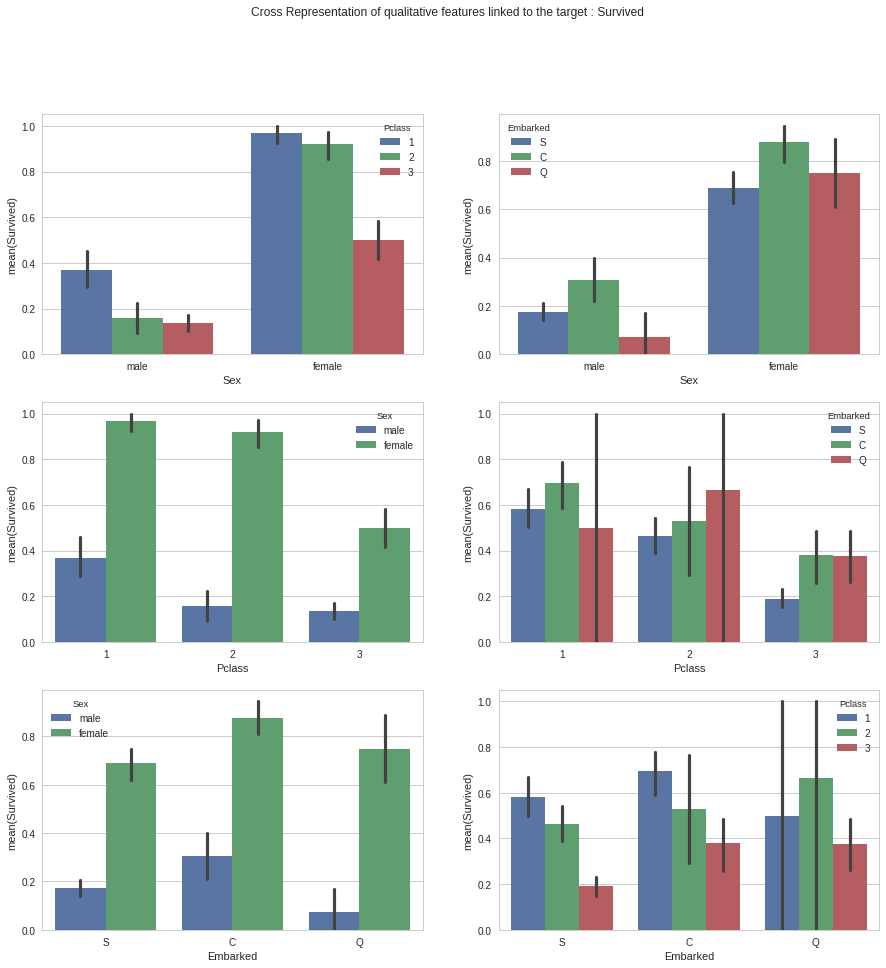

In [60]:
# Cross relation betwen (Sex, Pclass, Embarked) by mean of survival
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(15,15))
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Sex',y='Survived',hue='Embarked', data=df_train, ax=axis2)

sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='Embarked', data=df_train, ax=axis4)

sns.barplot(x='Embarked',y='Survived',hue='Sex', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='Pclass', data=df_train, ax=axis6)

fig5.suptitle("Cross Representation of qualitative features linked to the target : Survived")

Observations:
    - Male Pclass 1 as around twice the rate of male from Pclass 2 and 3
    - Female class 3 has a rate around twice lower than female from Pclass 1 and 2
    - Embarked do not seems very meaningfull for us, but Pclass 3 Embarked from S is really lower than the others 3nd Pclass and male from Q lower than male from S and C

In [ ]:
# Age

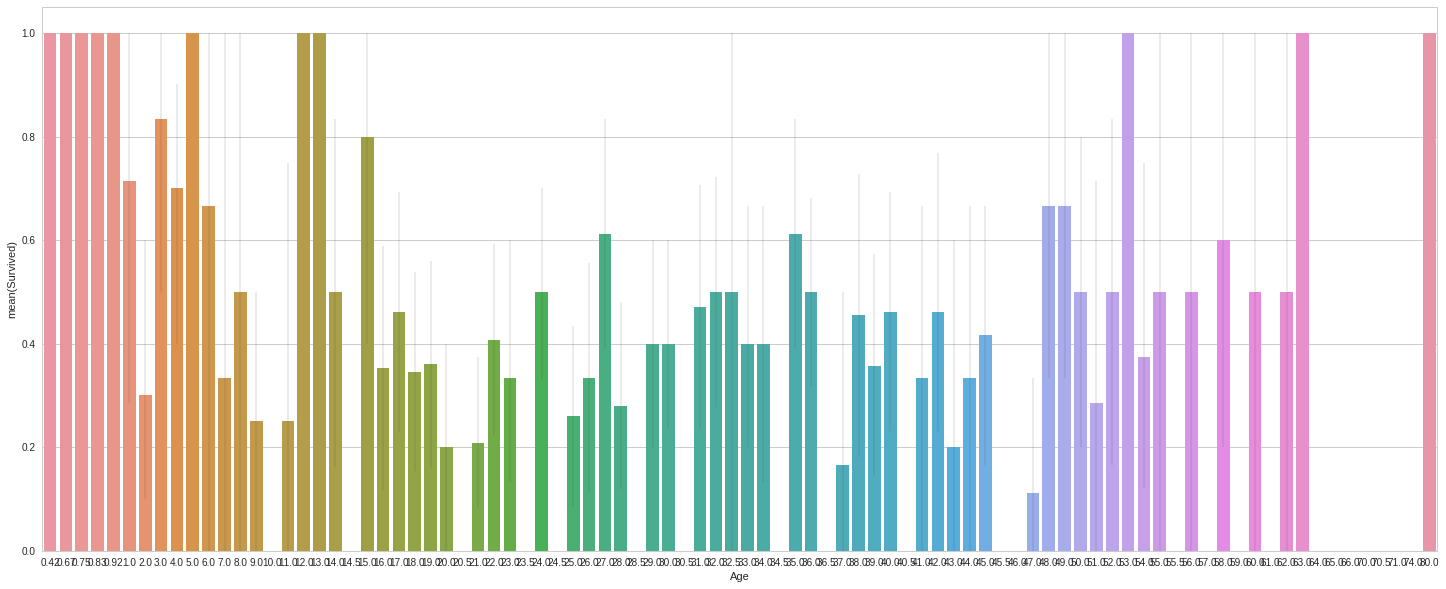

In [44]:
# Age by mean of survival
fig = plt.figure(figsize=(25,10))
fig = sns.barplot(x='Age', y='Survived', data=df_train,errwidth=0.2)

Observation :
    - Age by mean of survival is high from child and eldery and low for medium ages

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


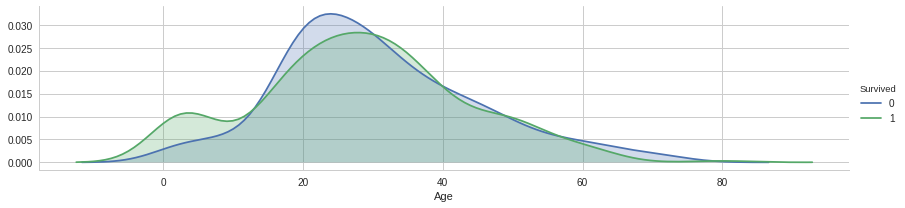

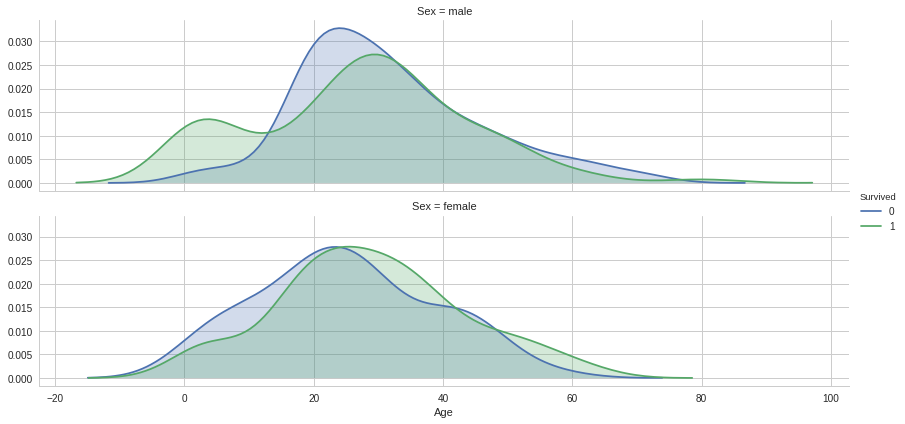

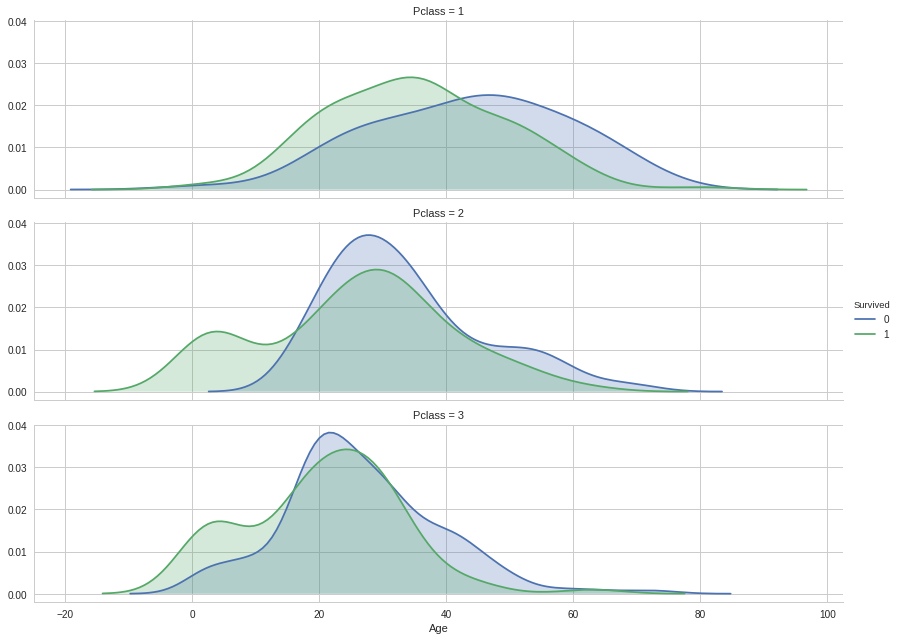

In [46]:
# Kernel density of survivor and non survivor by Age
g1 = sns.FacetGrid( df_train , hue='Survived' , aspect=4)
g1.map( sns.kdeplot , 'Age' , shade= True )
g1.add_legend()

# Kernel density of survivor and non survivor by Age and Sex 
g2 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Sex')
g2.map( sns.kdeplot , 'Age' , shade= True )
g2.add_legend()

# Kernel density of survivor and non survivor by Age and Pclass
g3 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Pclass')
g3.map( sns.kdeplot , 'Age' , shade= True )
g3.add_legend()

Obersations :
    - Need the creation of a feature for Child as the distribution show good survival rate for young passenger

In [ ]:
# Fare

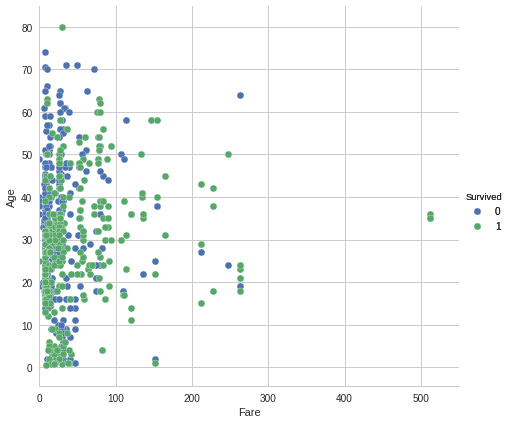

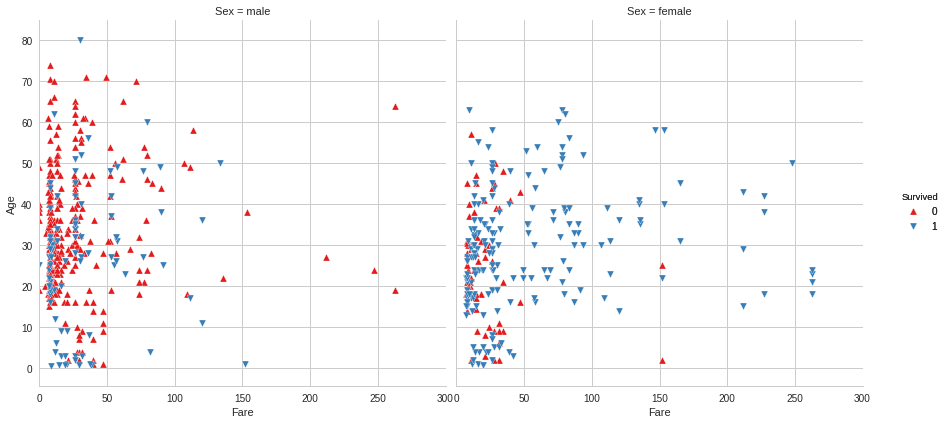

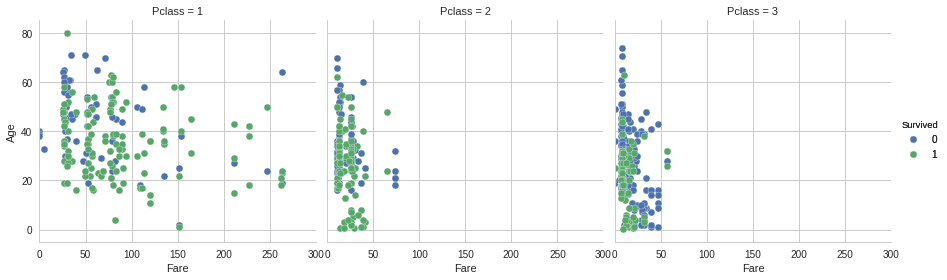

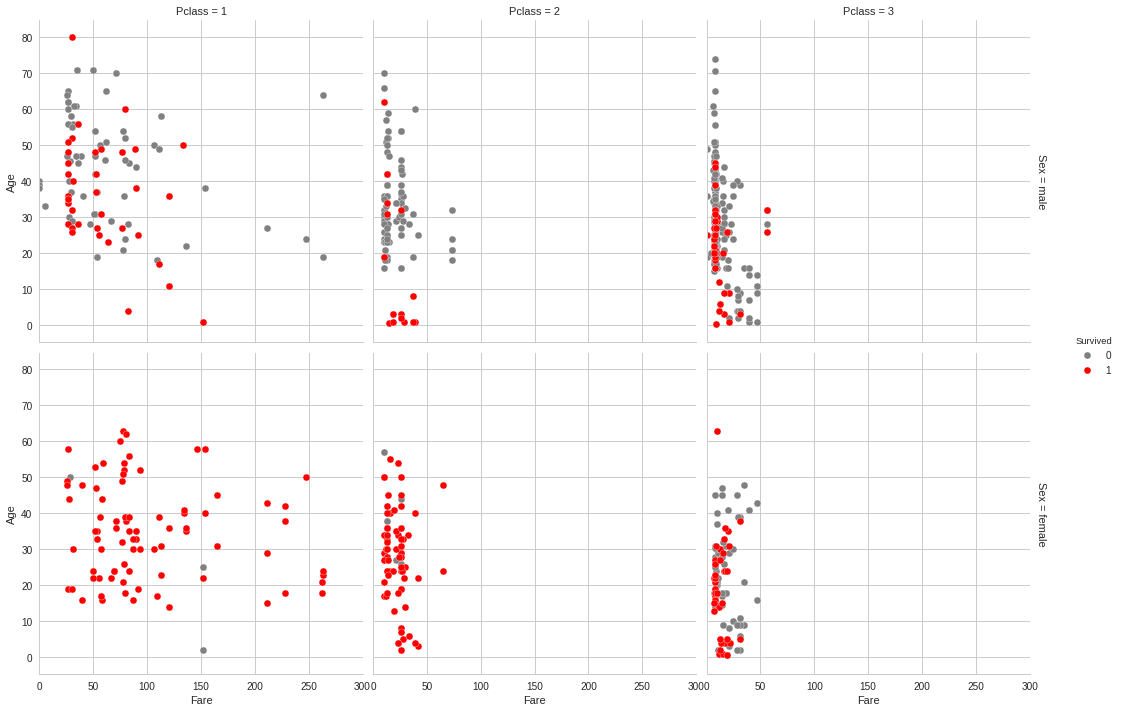

In [51]:
# Scatterplot Fare & Age
g = sns.FacetGrid(df_train, hue="Survived", size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 550))

# Scatterplot Fare & Age by Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass
g = sns.FacetGrid(df_train, col="Pclass", hue="Survived", size=4)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass & Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", row="Sex" ,margin_titles=True,
                  palette={1:"red", 0:"grey"},size=5)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.set(xlim=(0, 300))

Obersations :
    - Female with Fare more than 50 are really likely to survive
    - In Pclass 1 Fare more than 100 show a good increase of the rate

### Features engineering

[[back to top](#Table-of-contents)]

The visualization concerning the feature engineering is in the section [Visualization Part 2](#Visualization-Part-2)

#### Name

Creation of 4 features :
    - Name_Length : The number of letters of the full name
    - Name_Size : The categorised size : Short, Medium, Long and Very Long
    - Title : The extracted title of the passenger
    - Title_aggr : The aggregation of the less encountered values with high rate of survival together

In [3]:
#Create feature for the length of name 
combined["Name_Length"] = combined["Name"].apply(lambda x: len(x))

# Create a categorical feature Name_Size
combined['Name_Size']=pd.cut(combined['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

# Extract the title from each name by sliding between the ',' and the '.' 
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Map for aggregated titles
Title_Dictionary = {
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dona":       "Royalty",
                    "the Countess":"Royalty"
                    }
    
# Mapping
combined['Title_aggr'] = combined.Title.map(Title_Dictionary)

#### Family

Creation of 2 features:
    - Number of relatives = SibSp + Parch
    - Size_Family =  The categorised size : Alone, Small and Big

In [4]:
# Creation of a feature Number_of_relatives = SibSp + Parch
combined['Number_of_relatives']=combined['SibSp']+combined['Parch']

# Creation of a categorical feature Size_Family
combined.loc[combined['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
combined.loc[ (combined['Number_of_relatives'] > 0) 
            & (combined['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
combined.loc[combined['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

#### Cabin

Creation of the Deck feature by extraction of the cabin number

In [5]:
# Mostly NaN values
print('Number of null values:')
display(combined.Cabin.isnull().sum())

# Create a category Unknown
combined['Cabin'] = combined.Cabin.fillna( 'U' )

# Get the Deck 
combined["Deck"]=combined.Cabin.str[0]

Number of null values:


1014

### Missing Values

[[back to top](#Table-of-contents)]

#### Embarked

Displaying the missing values and remplacing them by looking at the boxplot of Embarked and Pclass with Fare

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


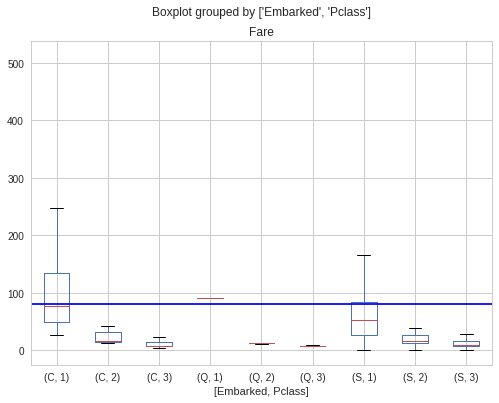

In [6]:
# Get and display the rows where Embarked is null
display(combined[combined.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']])

# Display boxplot of Embarked missing values
combined.boxplot(column='Fare', by=['Embarked','Pclass'], figsize=(8,6))
plt.axhline(y=80, color='blue')

# Remplace null values by C as most people who are Pclass 1 and Fare 80 has Embarked from C
combined = combined.set_value(combined.Embarked.isnull(), 'Embarked', 'C')

#### Fare

Displaying the missing values and remplacing them by the mean of Fare for the same Pclass and Embarked.

,Pclass,Fare,Embarked


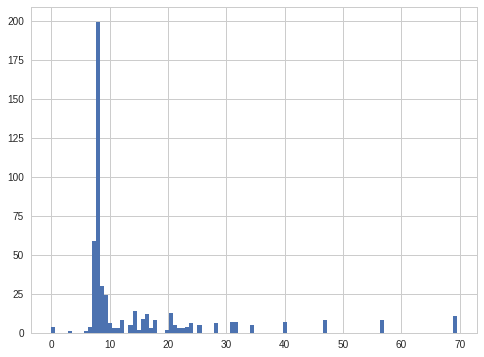

In [53]:
# Visualization of the fare which is missing
display(combined[combined.Fare.isnull()][['Pclass', 'Fare', 'Embarked']])
combined.loc[(combined['Pclass']==3) & (combined['Embarked']=='S')].Fare.hist(bins=100,figsize=(8,6))

# Get and affect the median to the missing value
Fare_median=combined[(combined.Pclass==3) & (combined.Embarked=='S')].Fare.median()
combined["Fare"].fillna(Fare_median, inplace=True)

#### Age with median

Filling Age by taking the mean of a group by with Sex, Pclass and Title_aggr

In [8]:
# Fill the NaN values with median using Sex, Pclass and Title
grouped = combined.groupby(['Sex','Pclass','Title_aggr'])
age_median = grouped['Age'].median()
combined["Age"] = combined.groupby(['Sex','Pclass','Title_aggr'])['Age'].transform(lambda x: x.fillna(x.median()))

# Display the median by Sex Pclass and Title_aggr
display(age_median)

Sex     Pclass  Title_aggr
female  1       Miss          30.0
                Mrs           45.0
                Officer       49.0
                Royalty       39.0
        2       Miss          20.0
                Mrs           30.0
        3       Miss          18.0
                Mrs           31.0
male    1       Master        6.0 
                Mr            41.5
                Officer       52.0
                Royalty       40.0
        2       Master        2.0 
                Mr            30.0
                Officer       41.5
        3       Master        6.0 
                Mr            26.0
Name: Age, dtype: float64

### Visualization Part 2

This part of the visualization treat new features created during feature engineering

[[back to top](#Table-of-contents)]

In [62]:
# Verification of missing values
print('Number of null values :')
display(combined.isnull().sum())

# Split for visualization
df_train, df_test= split_train_test(combined)

# Display shape
display(df_train.shape)
display(df_test.shape)

# Name of columns
display(df_train.columns)

Number of null values :


index                  0  
Age                    0  
Cabin                  0  
Embarked               0  
Fare                   0  
Name                   0  
Parch                  0  
PassengerId            0  
Pclass                 0  
Sex                    0  
SibSp                  0  
Survived               418
Ticket                 0  
Data_set               0  
Train                  0  
Name_Length            0  
Name_Size              0  
Title                  0  
Title_aggr             0  
Number_of_relatives    0  
Size_Family            0  
Deck                   0  
dtype: int64

(891, 22)

(418, 22)

Index(['index', 'Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch',
       'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket',
       'Data_set', 'Train', 'Name_Length', 'Name_Size', 'Title', 'Title_aggr',
       'Number_of_relatives', 'Size_Family', 'Deck'],
      dtype='object')

#### Visualization Name

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


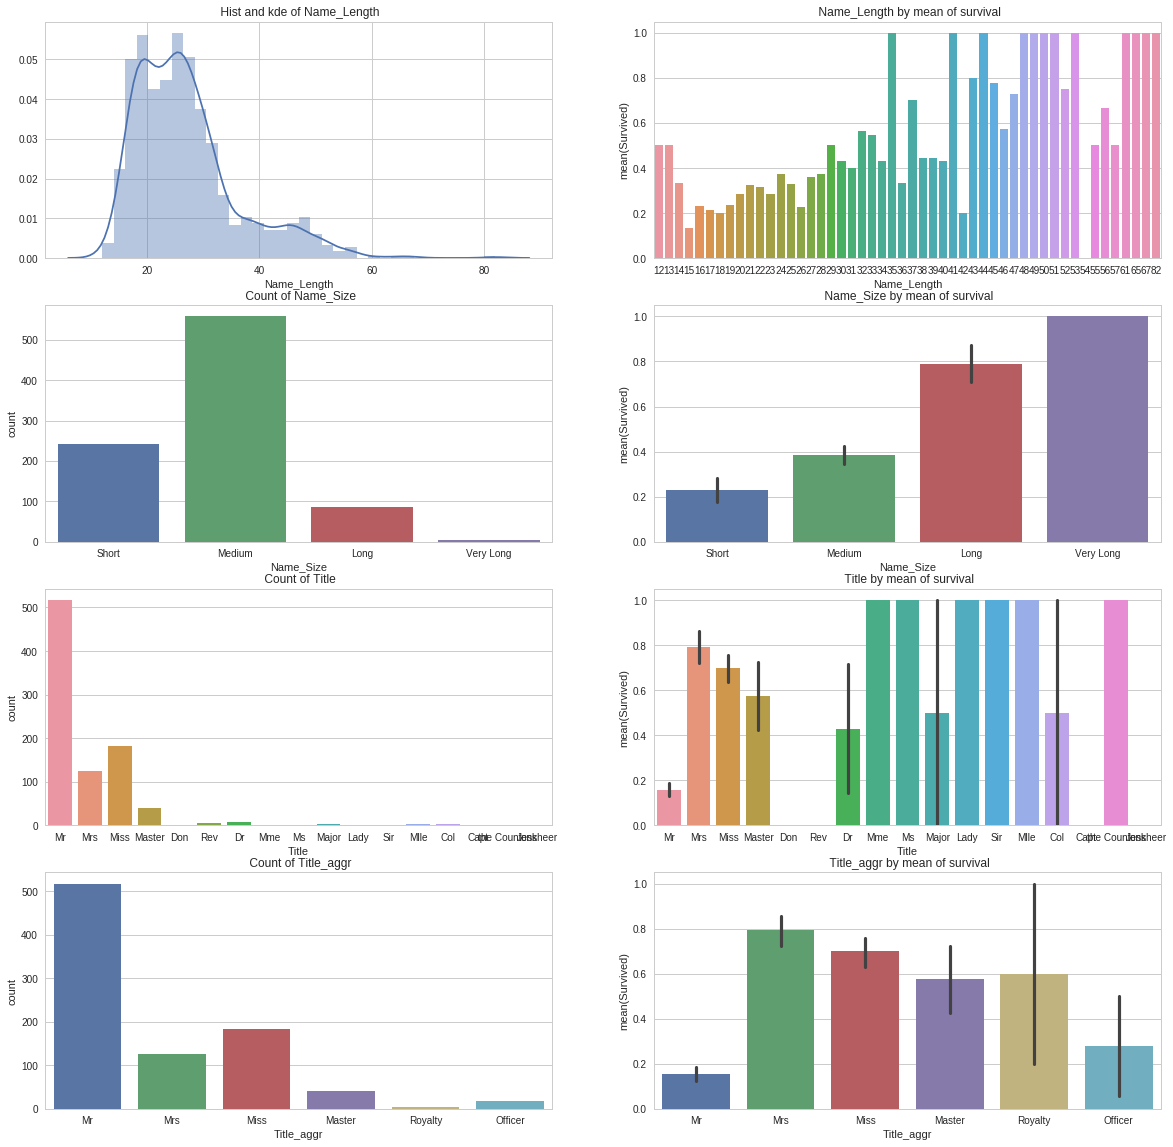

In [63]:
fig, ((axis1,axis2),(axis3,axis4),(axis5,axis6),(axis7,axis8)) = plt.subplots(4,2,figsize=(20,20))

# Plot Name_Length
sns.distplot(df_train['Name_Length'],ax=axis1)
axis1.set_title(" Hist and kde of Name_Length")
# Plot Name_Length by mean of survival
sns.barplot(x='Name_Length', y='Survived', data=df_train,errwidth=0,ax=axis2)
axis2.set_title(" Name_Length by mean of survival")

# Plot Name_Size
sns.countplot(x='Name_Size', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis3)
axis3.set_title(" Count of Name_Size")
# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis4)
axis4.set_title(" Name_Size by mean of survival")

# Plot Title
sns.countplot(x='Title', data=df_train, ax=axis5)
axis5.set_title(" Count of Title")
# Plot Title
sns.barplot(x='Title',y='Survived', data=df_train, ax=axis6)
axis6.set_title(" Title by mean of survival")

# Plot Title aggregate
sns.countplot(x='Title_aggr', data=df_train, ax=axis7)
axis7.set_title(" Count of Title_aggr")
# Plot Title aggregate
sns.barplot(x='Title_aggr',y='Survived', data=df_train, ax=axis8)
axis8.set_title(" Title_aggr by mean of survival")

# Display Title aggregate and Name Size by mean of survival
#sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train,errwidth=1)

Observations :
    - Name_Length has a big density between 15 and 35 and decrease after a small bump
    - Name_Length by mean of survival increase with Name_Length
    - Name_Size is mostly composed of Medium than Short.
    - Name_Size by mean of survival increase with Name_Size
    - Title mostly composed of Mr, Mrs, Miss and Master
    - Title by mean of survival is low for Mr and high for Female and Master
    - Title_aggre aggreate all the small features of Title into Royality and Officer 

#### Visualization Family

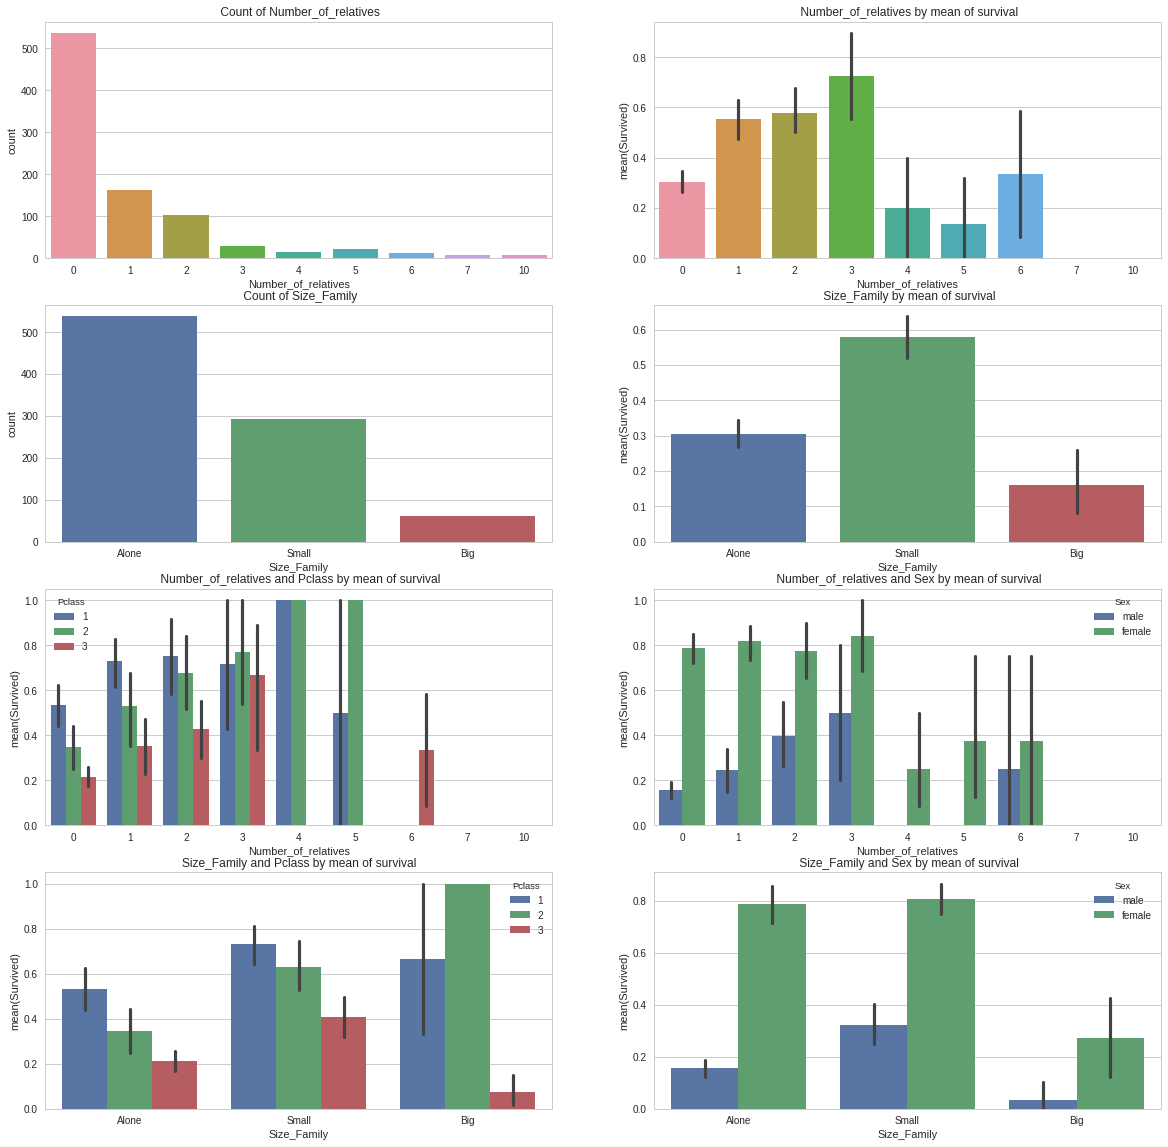

In [64]:
fig, ((axis1,axis2),(axis3,axis4),(axis5,axis6),(axis7,axis8)) = plt.subplots(4,2,figsize=(20,20))

# Plot Number_of_relatives
sns.countplot(x='Number_of_relatives', data=df_train, ax=axis1)
axis1.set_title(" Count of Number_of_relatives")
# Plot Number_of_relatives by mean of survival
fig2 = sns.barplot(x='Number_of_relatives',y='Survived', data=df_train, ax=axis2)
axis2.set_title(" Number_of_relatives by mean of survival")

# Plot Size_Family
sns.countplot(x='Size_Family', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis3)
axis3.set_title(" Count of Size_Family")
# Plot Size_Family by mean of survival
sns.barplot(x='Size_Family',y='Survived', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis4)
axis4.set_title(" Size_Family by mean of survival")

# Plot Number_of_relatives and Pclass 
sns.barplot(x='Number_of_relatives',y='Survived',hue='Pclass', data=df_train, ax=axis5)
axis5.set_title(" Number_of_relatives and Pclass by mean of survival")
# Plot Number_of_relatives and Pclass by mean of survival
sns.barplot(x='Number_of_relatives',y='Survived',hue='Sex', data=df_train, ax=axis6)
axis6.set_title(" Number_of_relatives and Sex by mean of survival")

# Plot Size_Family and Pclass
sns.barplot(x='Size_Family',y='Survived',hue='Pclass', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis7)
axis7.set_title("Size_Family and Pclass by mean of survival")
# Plot Size_Family  and Pclass by mean of survival
sns.barplot(x='Size_Family',y='Survived',hue='Sex', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis8)
axis8.set_title(" Size_Family and Sex by mean of survival")


Observations :
    - Number_of_relatives mostly 0, 1, 2
    - Size_Family is mostly composed of Alone and Small.
    - Size_Family by mean of survival is low for Alone and Big and higher for Small group
    - Male get an increase of the rate of survival with Number_of_relatives from 0 to 3

#### Visualization Deck

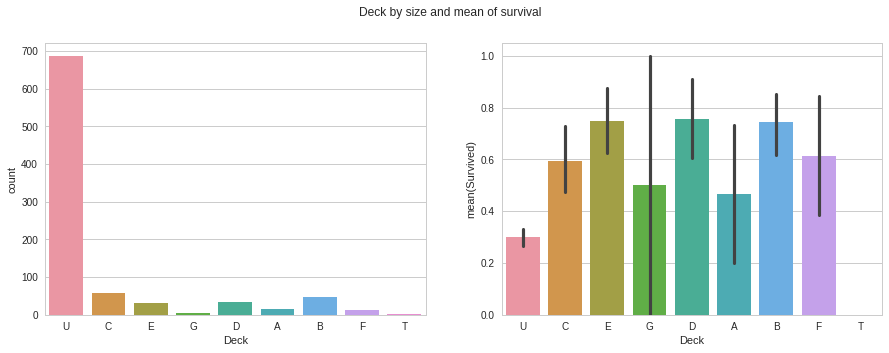

In [67]:
# Show Deck by size and mean of survival
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Deck', data=df_train, ax=axis1)
sns.barplot(x='Deck', y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Deck by size and mean of survival")

Observations:
    - Mostly Unknow and no significant difference with the mean of survival
    - Will not be used

#### All features between Training and Testing set

Test the stratification of features between Training and Testing set, so that we have a better idea of which feature can be usefull. Moreover it can lead to the discover that some feature engineering will certainly not work well.

In [68]:
# Display columns
display(combined.columns)

# Display shape
display(df_test.shape)
display(df_train.shape)
display(combined.shape)

# Ratio between the size of the training and testing set
Ratio = df_train.shape[0]/df_test.shape[0]
print('Ratio between training and testing set:',Ratio)

Index(['index', 'Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch',
       'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket',
       'Data_set', 'Train', 'Name_Length', 'Name_Size', 'Title', 'Title_aggr',
       'Number_of_relatives', 'Size_Family', 'Deck'],
      dtype='object')

(418, 22)

(891, 22)

(1309, 22)

Ratio between training and testing set: 2.1315789473684212


By a countplot we can check if the ratio of 2,1 is followed for the qualitative features

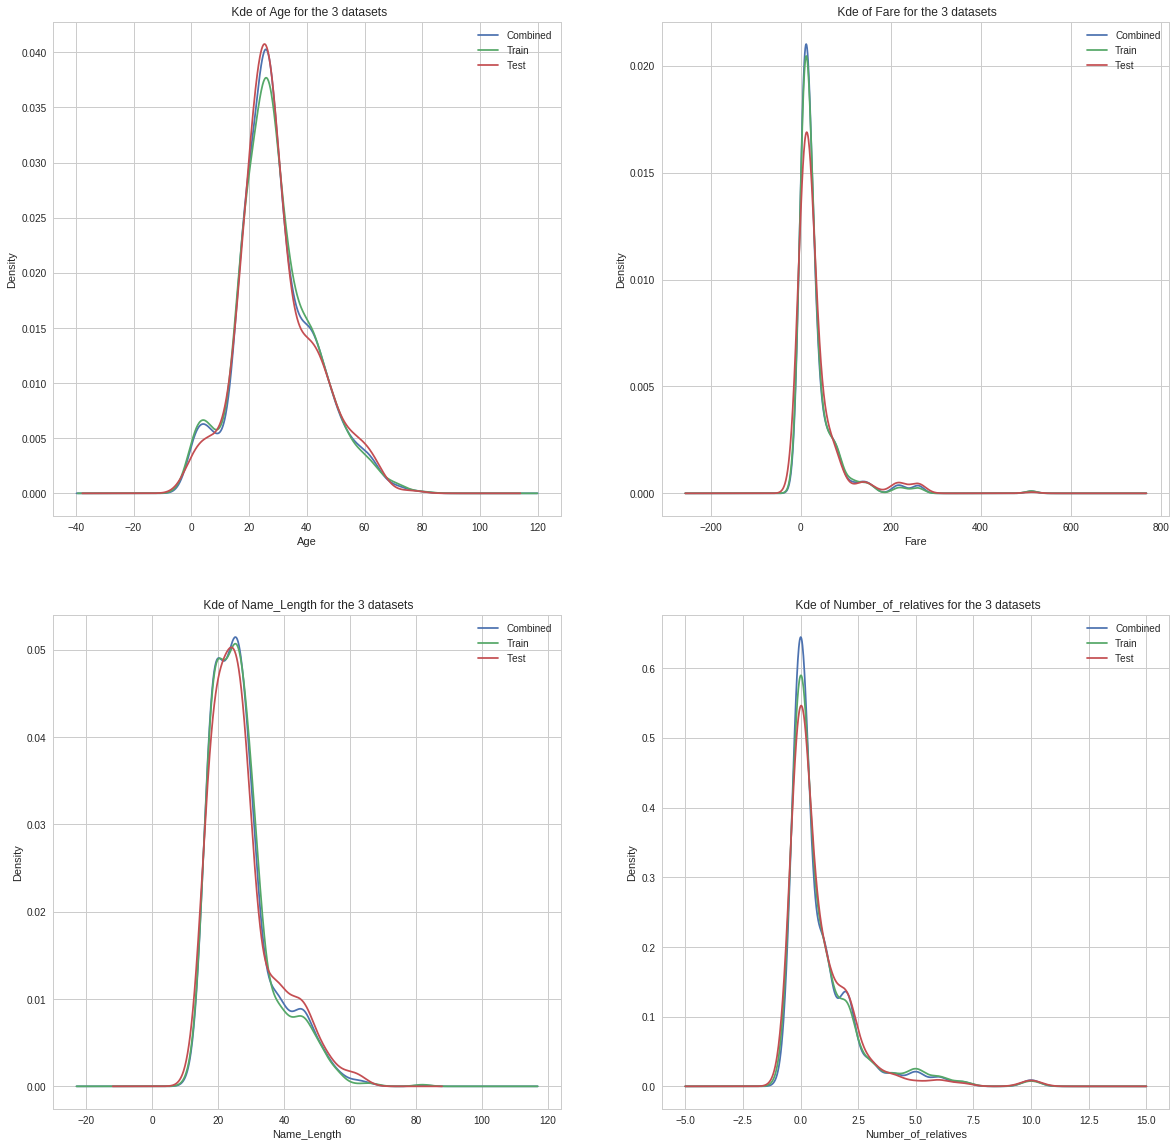

In [69]:
# Kde of Age, Fare, Name_Length and Number_of_relatives
fig, ((axis1,axis2),(axis3,axis4))= plt.subplots(2,2,figsize=(20,20))

# Age distribution within 3 datasets
combined.Age.plot(kind='kde',ax=axis1)    
df_train.Age.plot(kind='kde',ax=axis1)  
df_test.Age.plot(kind='kde',ax=axis1)  
axis1.set_xlabel("Age")    
axis1.set_title(" Kde of Age for the 3 datasets")
axis1.legend(('Combined', 'Train','Test'))

# Fare distribution within 3 datasets
combined.Fare.plot(kind='kde',ax=axis2)    
df_train.Fare.plot(kind='kde',ax=axis2)  
df_test.Fare.plot(kind='kde',ax=axis2)  
axis2.set_xlabel("Fare")    
axis2.set_title(" Kde of Fare for the 3 datasets")
axis2.legend(('Combined', 'Train','Test'))

# Name_Length distribution within 3 datasets
combined.Name_Length.plot(kind='kde',ax=axis3)    
df_train.Name_Length.plot(kind='kde',ax=axis3)  
df_test.Name_Length.plot(kind='kde',ax=axis3)  
axis3.set_xlabel("Name_Length")    
axis3.set_title(" Kde of Name_Length for the 3 datasets")
axis3.legend(('Combined', 'Train','Test'))

# Number_of_relatives distribution within 3 datasets
combined.Number_of_relatives.plot(kind='kde',ax=axis4)    
df_train.Number_of_relatives.plot(kind='kde',ax=axis4)  
df_test.Number_of_relatives.plot(kind='kde',ax=axis4)  
axis4.set_xlabel("Number_of_relatives")    
axis4.set_title(" Kde of Number_of_relatives for the 3 datasets")
axis4.legend(('Combined', 'Train','Test'))

Observations:
    - Age from the Test set don't have the bump for child in the kernel density
    - Name_Length from Testing have more high values around 40

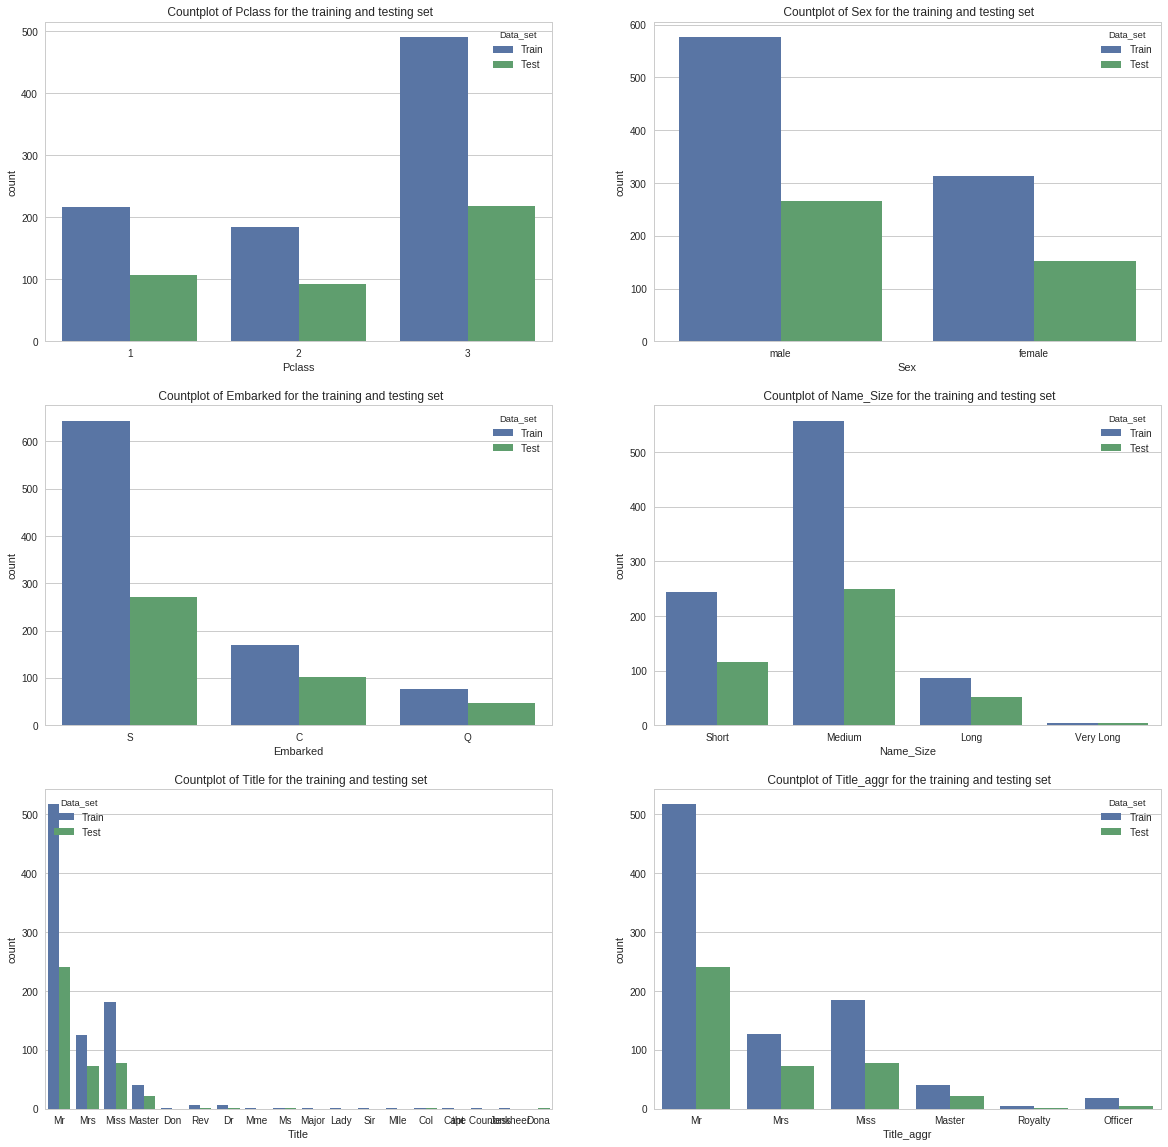

In [71]:
# Count of Pclass, Sex, Embarked, Name_Size, Title and Title_aggr
fig, ((axis1,axis2),(axis3,axis4),(axis5,axis6))= plt.subplots(3,2,figsize=(20,20))

# Pclass
sns.countplot(x='Pclass',hue='Data_set', data=combined, ax=axis1)
axis1.set_xlabel("Pclass")    
axis1.set_title(" Countplot of Pclass for the training and testing set")

# Sex
sns.countplot(x='Sex',hue='Data_set', data=combined, ax=axis2)
axis2.set_xlabel("Sex")    
axis2.set_title(" Countplot of Sex for the training and testing set")

# Embarked
sns.countplot(x='Embarked',hue='Data_set', data=combined, ax=axis3)
axis3.set_xlabel("Embarked")    
axis3.set_title(" Countplot of Embarked for the training and testing set")

# Name_Size
sns.countplot(x='Name_Size',hue='Data_set', data=combined, ax=axis4)
axis4.set_xlabel("Name_Size")    
axis4.set_title(" Countplot of Name_Size for the training and testing set")

# Title
sns.countplot(x='Title',hue='Data_set', data=combined, ax=axis5)
axis5.set_xlabel("Title")    
axis5.set_title(" Countplot of Title for the training and testing set")

# Title_aggr
sns.countplot(x='Title_aggr',hue='Data_set', data=combined, ax=axis6)
axis6.set_xlabel("Title_aggr")    
axis6.set_title(" Countplot of Title_aggr for the training and testing set")

Observations :
    - Qualitative features seem  well stratified between Train et Test

### Features Encoding

Label encoding and one hot encoding for nominal features and scalling for quantitative features.

[[back to top](#Table-of-contents)]

In [65]:
display(combined.columns)
display(combined.isnull().sum())
display(combined.shape)
display(combined[["Embarked","Sex","Title_aggr","Size_Family","Name_Size","Pclass"]].head())

Index(['index', 'Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch',
       'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket',
       'Data_set', 'Train', 'Name_Length', 'Name_Size', 'Title', 'Title_aggr',
       'Number_of_relatives', 'Size_Family', 'Deck'],
      dtype='object')

index                  0  
Age                    0  
Cabin                  0  
Embarked               0  
Fare                   0  
Name                   0  
Parch                  0  
PassengerId            0  
Pclass                 0  
Sex                    0  
SibSp                  0  
Survived               418
Ticket                 0  
Data_set               0  
Train                  0  
Name_Length            0  
Name_Size              0  
Title                  0  
Title_aggr             0  
Number_of_relatives    0  
Size_Family            0  
Deck                   0  
dtype: int64

(1309, 22)

,Embarked,Sex,Title_aggr,Size_Family,Name_Size,Pclass
0,S,male,Mr,Small,Medium,3
1,C,female,Mrs,Small,Long,1
2,S,female,Miss,Alone,Medium,3
3,S,female,Mrs,Small,Long,1
4,S,male,Mr,Alone,Medium,3


#### Categorial features encoding

##### Label Encoding

In [9]:
# Dataframe with numerical categorical feature
combined_num_cat = pd.DataFrame()

# LabelEncoder
labelEnc = LabelEncoder()

# Columns to apply
cat_vars=["Embarked","Sex","Title_aggr","Size_Family","Name_Size"]

for col in cat_vars:
    labelEnc.fit(np.unique(list(combined[col].values)))
    combined_num_cat[col]=labelEnc.transform(combined[col].astype('str'))
    
labelEnc.fit(np.unique(list(combined["Pclass"].values)))
combined_num_cat["Pclass"]=labelEnc.transform(combined["Pclass"].astype('int'))

display(combined_num_cat.head())

##### One Hot  Encoding

In [11]:
def one_hot(df_in, cols):
    df_out = pd.DataFrame()
    for each in cols:
        dummies = pd.get_dummies(df_in[each], prefix=each, drop_first=False)
        df_out = pd.concat([df_out, dummies], axis=1)
    return df_out

In [12]:
# Columns to apply
cat_vars=['Embarked','Sex',"Title_aggr","Size_Family","Name_Size","Pclass"]

# Get One Hot encoder
combined_One_Hot_Cat = one_hot(combined,cat_vars)

display(combined_One_Hot_Cat.head())

### Feature Scalling

[[back to top](#Table-of-contents)]

In [73]:
# Columns and dataframe for features scalling
std_columns = ['Fare','Age','Name_Length','Number_of_relatives']
combined_num_std = pd.DataFrame(combined[std_columns])

# StandardScaller process
std_scale = StandardScaler()
combined_num_std[std_columns] = std_scale.fit_transform(combined[std_columns].astype(float))

display(combined[['Fare','Age','Name_Length','Number_of_relatives']].head())
display(combined_num_std[std_columns].head())

,Fare,Age,Name_Length,Number_of_relatives
0,7.2500,22.0,23,1
1,71.2833,38.0,51,1
2,7.9250,26.0,22,0
3,53.1000,35.0,44,1
4,8.0500,35.0,24,0


,Fare,Age,Name_Length,Number_of_relatives
0,-0.503176,-0.541471,-0.434672,0.073352
1,0.734809,0.648868,2.511806,0.073352
2,-0.490126,-0.243886,-0.539904,-0.558346
3,0.383263,0.425680,1.775186,0.073352
4,-0.487709,0.425680,-0.329441,-0.558346


### Data Preparation

Available :
    - combined_num_std
    - combined_One_Hot_Cat
    - combined_num_cat

In [16]:
# Concat
combined_OH_Std = pd.concat([combined_num_std,combined_One_Hot_Cat],axis=1)
combined_Num_Std = pd.concat([combined_num_std,combined_num_cat],axis=1)

# Display shape
display(combined_OH_Std.shape)
display(combined_Num_Std.shape)

(1309, 25)

(1309, 10)

In [17]:
# Split into Train and Eval
Train_OH_Std, Eval_OH_Std= split_train_test(combined_OH_Std)
Train_Num_Std, Eval_Num_Std = split_train_test(combined_Num_Std)

# Display shape
display(Train_OH_Std.shape)
display(Eval_OH_Std.shape)

(891, 25)

(418, 25)

In [18]:
# Select Data
data = Train_OH_Std
test_data = Eval_OH_Std
target = targets
columns_name = list(Train_OH_Std)

# Train & Validation set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state = 42,stratify=target)

# Dataframe of prediction
Prediction = pd.DataFrame()

### Features Importance


Study the relation between first the Quantitative Features and the target and after between the One Hot categorical encoding and the target.

Features Selection will be made using the results of this analysis.

[[back to top](#Table-of-contents)]

#### Quantitative Features

In [19]:
Quantitative = ['Fare','Age','Name_Length','Number_of_relatives']

In [20]:
# Concant data and target

QF_Target = pd.concat([data[Quantitative],target],axis=1)
Survived = QF_Target[QF_Target['Survived'] == 1]
Died = QF_Target[QF_Target['Survived'] == 0]

PointBiser = pd.DataFrame()
TTest = pd.DataFrame()
Anova = pd.DataFrame()
Lda = pd.DataFrame() 

for var in enumerate(Quantitative) : 
    
    # Point Biserial correlation
    pb = stats.pointbiserialr(QF_Target['Survived'], QF_Target[var[1]])
    PointBiser.loc[var[0],'Feature'] = var[1]
    PointBiser.loc[var[0],'Point Biserial Pearson Corr'] = pb.correlation
    PointBiser.loc[var[0],'Pval'] = pb.pvalue
    PointBiser.sort_values('Pval',ascending=True,inplace=True)
    
    # T Test independance
    #t_test = stats.ttest_ind(Survived[var[1]], Died[var[1]])
    #TTest.loc[var[0],'Feature'] = var[1]
    #TTest.loc[var[0],'Student T Test Indep'] = t_test[0]
    #TTest.loc[var[0],'Pval'] = t_test[1]
    #TTest.sort_values('Pval',ascending=True,inplace=True)    
    
    # Anova
    anova_one_way = stats.f_oneway(Survived[var[1]], Died[var[1]])
    Anova.loc[var[0],'Feature'] = var[1]
    Anova.loc[var[0],'Anova F value'] = anova_one_way[0]
    Anova.loc[var[0],'Pval'] = anova_one_way[1]
    Anova.sort_values('Pval',ascending=True,inplace=True)  
    
    # LDA
    lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
    lda.fit(data[Quantitative], target)
    Lda['Feature'] = Quantitative
    Lda['LDA Coef'] = lda.coef_.transpose()
    Lda.sort_values('LDA Coef',ascending=False,inplace=True)
   

display(PointBiser)
#display(TTest)
display(Anova)
display(Lda)

,Feature,Point Biserial Pearson Corr,Pval
2,Name_Length,0.332350,2.026795e-24
0,Fare,0.257307,6.120189e-15
1,Age,-0.059594,7.541267e-02
3,Number_of_relatives,0.016639,6.198911e-01


,Feature,Student T Test Indep,Pval
2,Name_Length,10.506602,2.026795e-24
0,Fare,7.939192,6.120189e-15
1,Age,-1.780029,7.541267e-02
3,Number_of_relatives,0.496179,6.198911e-01


,Feature,Anova F value,Pval
2,Name_Length,110.388690,2.026795e-24
0,Fare,63.030764,6.120189e-15
1,Age,3.168504,7.541267e-02
3,Number_of_relatives,0.246193,6.198911e-01


,Feature,LDA Coef
2,Name_Length,0.880017
0,Fare,0.682472
1,Age,-0.394781
3,Number_of_relatives,-0.407431


Point Biserial Corr - Pearson Corr apply to nominal and continuous features:
    - Very Small correlation for Age and Number_of_relatives with high p-values
    - Positive correlation for Fare and Name_Length with very small p-value
    
Anova - Test mean equality between survived and not survived :
    - We can reject mean equality for Fare and Length
    - We can say nothing about Age and Number_of_relatives
    
LDA : Linear Discriminant Analysis
    - Fare and Length have a positive and high coefficient
    - Age and Number_of_relatives have a negative and smaller coefficient

#### One Hot Encoder

In [22]:
# Can do a MCA to study wich feature is grouped together and have the more weight
Qualitative = list(combined_One_Hot_Cat.columns)

In [23]:
from scipy.spatial import distance

import scipy.stats as ss

def Cramer_Chi2(crosstab):
    n = crosstab.sum().sum()
    chi2 = ss.chi2_contingency(crosstab)[0]
    pval = ss.chi2_contingency(crosstab)[1]
    CramerV = np.sqrt(chi2 / (n* (min(crosstab.shape) -1)))
    return CramerV, chi2, pval

In [24]:
# Concant data and target
QF_OH_Target = pd.concat([data[Qualitative],target],axis=1)

confusion_mat = pd.DataFrame()
Corr = pd.DataFrame()

Corr['Pearson Phi'] = QF_OH_Target.corr(method='pearson')["Survived"]

for var in enumerate(Qualitative) : 
    confusion_mat = pd.crosstab(QF_OH_Target['Survived'], QF_OH_Target[var[1]])
    Corr.loc[var[1],'Cramer V'] = Cramer_Chi2(confusion_mat)[0]
    Corr.loc[var[1],'Test Chi 2 - Independance'] = Cramer_Chi2(confusion_mat)[1]
    Corr.loc[var[1],'Chi 2 Pval']= Cramer_Chi2(confusion_mat)[2]
    Corr.loc[var[1],'Hamming Distance'] = distance.hamming(QF_OH_Target['Survived'].astype(int), QF_OH_Target[var[1]].astype(int))
    Corr.loc[var[1],'Dice Coefficient'] = distance.dice(QF_OH_Target['Survived'].astype(int), QF_OH_Target[var[1]].astype(int))
    
Corr.sort_values('Chi 2 Pval',ascending=True,inplace=True)
display(Corr)

,Pearson Phi,Cramer V,Test Chi 2 - Independance,Chi 2 Pval,Hamming Distance,Dice Coefficient
Title_aggr_Mr,-0.549199,0.546861,266.459805,6.706529e-60,0.782267,0.811409
Sex_female,0.543351,0.540936,260.717020,1.197357e-58,0.213244,0.289634
Sex_male,-0.543351,0.540936,260.717020,1.197357e-58,0.786756,0.762786
Title_aggr_Mrs,0.344935,0.341634,103.992178,2.031164e-24,0.299663,0.569296
Title_aggr_Miss,0.332795,0.329945,96.997487,6.941537e-23,0.300786,0.509506
Pclass_3,-0.322308,0.319988,91.231792,1.277905e-21,0.667789,0.714286
Pclass_1,0.285904,0.283211,71.465839,2.821002e-17,0.320988,0.512545
Size_Family_Small,0.279855,0.277396,68.561247,1.229976e-16,0.332211,0.466877
Name_Size_Long,0.273448,0.269540,64.732768,8.577650e-16,0.327722,0.682243
Size_Family_Alone,-0.203367,0.201009,36.000514,1.972654e-09,0.620651,0.629124


**Pearson Phi** :
    - Very small correlation :
        - Pclass_2
        - Title_aggr_Master
        - Name_Size_Very Long
        - Title_aggr_Royalty
        - Embarked_Q
        - Name_Size_Medium
    - High Correlation
        - Positive: 
            - Sex_female
            - Title_aggr_Mrs
            - Title_aggr_Miss
            - Pclass_1
            - Size_Family_Small
            - Name_Size_Long
        - Negative: 
            - Sex_male
            - Pclass_3
        
**Chi 2 Independance and Cramer V**:
    - We can reject independance and the Cramer Corelation if high for:
        - Title_aggr_Mr 
        - Sex_female 
        - Sex_male
        --> The information of this 3 features is mostly the same
    - We can reject independance and the Cramer Correlation is medium for :
        - Title_aggr_Mrs 
        - Title_aggr_Miss 
        - Pclass_3
        - Pclass_1
        - Size_Family_Small
        - Name_Size_Long
        - Size_Family_Alone
        - Name_Size_Short
    - We can reject independance but the Cramer Correlation is low
        - Embarked_C
        - Embarked_S
        - Size_Family_Big
    - At 5 % we can't reject independance and the Cramer Correlation if very small:
        - Name_Size_Very Long
        - Title_aggr_Officer
        - Title_aggr_Royalty
        - Name_Size_Medium
        - Embarked_Q 
        
**Hamming distance - Tell us about the numbers of difference** :
    - High distance
        - Sex_male
        - Title_aggr_Mr 
        - Pclass_3
        - Size_Family_Alone
        - Embarked_S
    - Medium
        - Name_Size_Short
        - Name_Size_Medium
        - Size_Family_Big
        - Embarked_Q
        - Pclass_2
        - Title_aggr_Officer
        - Title_aggr_Royalty
        - Name_Size_Very Long 
        - Title_aggr_Master
        - Embarked_C
    - Small distance
        - Size_Family_Small
        - Name_Size_Long
        - Pclass_1
        - Title_aggr_Miss
        - Title_aggr_Mrs
        - Sex_female
   
**Dice - Tell us about how much disjoint (0) or equal(1)**:
    - Mostly disjoint
        - Sex_female
    - Medium
        - Size_Family_Alone
        - Embarked_C
        - Title_aggr_Mrs
        - Embarked_S
        - Name_Size_Medium
        - Pclass_1
        - Title_aggr_Miss
        - Size_Family_Small
    - Mostly joint:
        - Title_aggr_Royalty
        - Name_Size_Very Long
        - Title_aggr_Officer
        - Size_Family_Big
        - Title_aggr_Master
        - Embarked_Q
        - Title_aggr_Mr
        - Name_Size_Short
        - Sex_male
        - Pclass_3

Note about χ2 test, Cramer V and p-value :
The p-value you got comes from the χ2 test. It tells you the probability of getting a χ2 statistic as extreme or more extreme than yours if the null hypothesis is true. It tells you nothing about how big the effect is.
On the other hand, Cramer's V is a measure of effect size. It tells you how big the effect is. It tells you nothing about whether or not the effect is 'significant'. 

### Features Selection

Using the analysis done just before we can select some features to drop.
I decided to drop :
    - 'Number_of_relatives'
    - 'Title_aggr_Royalty'
    - 'Title_aggr_Officer'
    - 'Name_Size_Medium'
    - 'Embarked_Q'
    - 'Embarked_C'
    - 'Embarked_S'
    
Because :

    - Number_of_relatives do not seem to correlate well and we have some information left into Size_Family Alone and Big 
    - For nominals, Cramer V were low and we were unable to reject independance with the Chi 2 Test

[[back to top](#Table-of-contents)]

In [75]:
# Display shape before
display(data.shape)
display(test_data.shape)

(891, 17)

(418, 17)

In [55]:
# Dropping the data
data.drop(['Number_of_relatives','Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q',
           'Embarked_C','Embarked_S'],axis=1,inplace=True)
test_data.drop(['Number_of_relatives','Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q',
           'Embarked_C','Embarked_S'],axis=1,inplace=True)

ValueError: labels ['Number_of_relatives' 'Title_aggr_Royalty' 'Title_aggr_Officer'
 'Name_Size_Medium' 'Embarked_Q' 'Embarked_C' 'Embarked_S'] not contained in axis

In [74]:
# Display shape after
display(data.shape)
display(test_data.shape)

(891, 17)

(418, 17)

### Models Selection

First the creation of helper functions to do some easy grid search and plotting learning and validation curve.


Then the test of Gradient Boosting Classifier, Random Forest Classifier and SVC into one search, before tuning each of this estimators and grouping them into a voting classifier. 

[[back to top](#Table-of-contents)]

#### Helper functions

In [28]:
# Helper function to analyse and get result

""" 
========================
Grid Score into a Pandas Dataframe
========================
"""
def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params, and sorted by mean test
    """
    df=pd.DataFrame.from_dict(cv_results)
    df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df


""" 
========================
Plot confusion matrix 
========================
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

""" 
========================
Helper function for GridSearch
========================
"""    
def grid_search_global(dict_pip, dict_param, class_names, X_train, y_train, X_test, y_test, verbose = 2):
    
    """
    This function help doing GridSearch with multiples pipelines of estimators and parameters.
    """
    
    # Creation of the return objects
    dict_of_res={}
    dict_of_best={}
    df_results_global=pd.DataFrame()
    
    print ("Starting Gridsearch")
    
    for key in dict_param.keys():
        gs = GridSearchCV(dict_pip[key], dict_param[key], verbose=0, refit=True, n_jobs=-1, cv=5)
        gs = gs.fit(X_train, y_train)
        dict_of_res[key]=gs.grid_scores_
        
        # Prediction and scores for the evaluation set
        y_test_pred=gs.predict(X_test)
        validation_acc = accuracy_score(y_test,y_test_pred)
        validation_Fscore = f1_score(y_test,y_test_pred)
        confusion_mat = confusion_matrix(y_test,y_test_pred)
        precission = precision_score(y_test,y_test_pred)
        recall = recall_score(y_test,y_test_pred)
        
        # Saving of the results
        df_results=cv_results_to_df(gs.cv_results_)
        df_results['estimator'] = key
        df_results['val_score'] = validation_acc
        df_results['val_F_score'] = validation_Fscore
        df_results['val_Precis'] = precission
        df_results['val_Recall'] = recall
        df_results['val_Confusion'] = str(confusion_mat)
        df_results['|test-train|']=  np.absolute (df_results['mean_train_score'] - df_results['mean_test_score']) 
        df_results['|val-test|']= np.absolute(df_results['mean_test_score'] - df_results['val_score'])
        
        
        df_results=df_results[['estimator','val_score','mean_test_score', 'mean_train_score', 'std_test_score', 'std_train_score',
                               '|val-test|','|test-train|','val_F_score','val_Precis','val_Recall','val_Confusion', 'params']]
        df_results_global=df_results_global.append(df_results)
        
        dict_of_best[key]=[gs.best_score_,gs.best_params_]
        
        # Display intermediate results
        if (verbose > 1) :
            print('\n-------------------------------------------------------------------------------------------------------')
            print ("Gridsearch for \n   estimator : %s \n   parameters : %s \n" % (key,dict_param[key]))
            print ("Best mean_test_score :", gs.best_score_)
            print ("Best params :",gs.best_params_)
            print("\nResults for the pipeline ")
            display(df_results)
        
    # Transfrom dict_of_best intro a Dataframe
    df_best=pd.DataFrame.from_dict(dict_of_best,'index')
    df_best.columns=['Scores','Parameters']
    df_best.sort_values('Scores',ascending=False,inplace=True) 
    
    # Sort the Dataframe of golbal results
    df_results_global.sort_values('val_score',ascending=False,inplace=True)
 
    # Display final results
    if (verbose > 0) :   
        print('\n -------------------------------------------------------------------------------------------------------')
        print('\nList of best score and parameters by pipeline')
        display(df_best)
        print('\nSummary')
        display(df_results_global) 
        print('\n -------------------------------------------------------------------------------------------------------')  
    print ("Gridsearch Finished")
    return df_best, dict_of_best, df_results_global


""" 
========================
Plotting Learning Curves - From scikit learn example
========================
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(0.7, 1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


""" 
========================
Plotting Validation Curves 
========================
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, estimator_name, param_name, param_range, X, y, cv,
    scoring='accuracy', scale='classic' , n_jobs=-1):
    
    """
    Generate a simple plot of the validation learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    estimator_name : name of the estimator.
    param_range : range of parameters to try.
    scoring : scoring metric to use.
    scale : classic or semi log scale
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable
    n_jobs : integer, optional
        Number of jobs to run in parallel (default -1).
    """ 
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    title_fig='Validation Curve with %s' % estimator_name
    plt.title(title_fig)
    plt.xlabel(param_name)
    plt.ylabel("Score : %s" % scoring)
    plt.ylim(0.7, 1)
    lw = 2
    
    if (scale=='semilog'):
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    else :
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw) 

    plt.legend(loc="best")
    plt.show()
    

### Multipe Estimators

In [29]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state = 6725,stratify=target)

In [30]:
# Pipeline setup
models = { 
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Parameters setup
params = {
    'RandomForestClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'GradientBoostingClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

# Start grid search
df_best, dic_best, d_res = grid_search_global(dict_pip = models, dict_param = params, class_names = columns_name,
                                            X_train = X_train ,y_train = y_train, X_test = X_test, y_test = y_test,
                                            verbose = 1)

Starting Gridsearch

 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


,Scores,Parameters
SVC,0.827247,"{'C': 1, 'kernel': 'linear'}"
RandomForestClassifier,0.814607,{'n_estimators': 10}
GradientBoostingClassifier,0.813202,"{'learning_rate': 0.8, 'n_estimators': 10}"



Summary


,estimator,val_score,mean_test_score,mean_train_score,std_test_score,std_train_score,|val-test|,|test-train|,val_F_score,val_Precis,val_Recall,val_Confusion,params
2,GradientBoostingClassifier,0.832402,0.797753,0.915026,0.033065,0.007928,0.034649,1.172731e-01,0.779412,0.791045,0.768116,[[96 14]\n [16 53]],"{'learning_rate': 0.8, 'n_estimators': 15}"
5,GradientBoostingClassifier,0.832402,0.797753,0.955406,0.030198,0.001811,0.034649,1.576537e-01,0.779412,0.791045,0.768116,[[96 14]\n [16 53]],"{'learning_rate': 0.8, 'n_estimators': 30}"
2,SVC,0.832402,0.727528,0.732094,0.031850,0.009566,0.104874,4.565439e-03,0.769231,0.819672,0.724638,[[99 11]\n [19 50]],"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}"
5,SVC,0.832402,0.728933,0.732795,0.031794,0.008969,0.103470,3.862699e-03,0.769231,0.819672,0.724638,[[99 11]\n [19 50]],"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}"
4,SVC,0.832402,0.786517,0.787221,0.020943,0.005294,0.045885,7.039272e-04,0.769231,0.819672,0.724638,[[99 11]\n [19 50]],"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
1,SVC,0.832402,0.827247,0.827951,0.011179,0.003244,0.005155,7.037582e-04,0.769231,0.819672,0.724638,[[99 11]\n [19 50]],"{'C': 10, 'kernel': 'linear'}"
0,SVC,0.832402,0.827247,0.827951,0.011179,0.003244,0.005155,7.037582e-04,0.769231,0.819672,0.724638,[[99 11]\n [19 50]],"{'C': 1, 'kernel': 'linear'}"
13,GradientBoostingClassifier,0.832402,0.769663,0.960671,0.032719,0.003290,0.062739,1.910080e-01,0.779412,0.791045,0.768116,[[96 14]\n [16 53]],"{'learning_rate': 1.0, 'n_estimators': 35}"
12,GradientBoostingClassifier,0.832402,0.782303,0.956109,0.028727,0.004448,0.050099,1.738055e-01,0.779412,0.791045,0.768116,[[96 14]\n [16 53]],"{'learning_rate': 1.0, 'n_estimators': 30}"
11,GradientBoostingClassifier,0.832402,0.783708,0.948380,0.028494,0.005651,0.048694,1.646724e-01,0.779412,0.791045,0.768116,[[96 14]\n [16 53]],"{'learning_rate': 1.0, 'n_estimators': 25}"



 -------------------------------------------------------------------------------------------------------
Gridsearch Finished


### Gradient Boosting Classifier

[[back to top](#Table-of-contents)]

In [31]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state = 6725,stratify=target)

In [ ]:
# Pipeline setup
models = { 
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

# Parameters setup
params_quick = {
    'GradientBoostingClassifier': {'n_estimators': [5, 10, 15, 20], 
                                   'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                   'loss' : ['deviance', 'exponential'],
                                   'max_depth' : [3, 5, 7, 10],
                                   'min_samples_split': [3, 5, 7],
                                   'min_samples_leaf' : [3, 5, 7],
                                   'max_features' : [2, 4, 6, 8, 10]
                                  }
}

params_full = {
    'GradientBoostingClassifier': { 'n_estimators': range(1,20,1), 
                                   'learning_rate': [0.05,0.08,0.10,0.12,0.14,0.16],
                                  'loss' : ['deviance','exponential'],
                                  'max_depth' : range(2,4),
                                   'min_samples_split': range(2,10,1),
                                   'min_samples_leaf' : range(2,10,1),
                                   'max_features' : range(1,15,1)
                                  }
}

params = params_quick

# Start grid search
df_best_gbc, dic_best_gbc, d_res_gbc = grid_search_global(dict_pip = models, dict_param = params, class_names = columns_name,
                                            X_train = X_train ,y_train = y_train, X_test = X_test, y_test = y_test,
                                            verbose = 0)

In [ ]:
# Filter results
d_res_gbc.sort_values(by=['val_score','std_test_score'],ascending=[False,True],inplace=True)
d_res_gbc_sort = d_res_gbc.loc[(d_res_gbc['val_score'] > 0.80) 
              & (d_res_gbc['|val-test|'] < 0.015) 
              & (d_res_gbc['|test-train|'] < 0.015)  
              & (d_res_gbc['std_test_score'] < 0.015) 
              & (d_res_gbc['std_train_score'] < 0.015)]
display(d_res_gbc_sort)

# Take care not to search for too small values because it will certainly lead to overfitting our split of the data.

In [ ]:
# Selection of the parameters to study
index_selection_gbc = [177, 130, 106, 63, 87, 86]
df_study_gbc = d_res_gbc.loc[index_selection_gbc,['estimator','params','val_score','mean_test_score','mean_train_score','val_F_score']]
display(df_study_gbc)

In [ ]:
# Learning curve
index = list(df_study_gbc.index)
for ind in index :
    estim = df_study_gbc.loc[ind, 'estimator']
    params = df_study_gbc.loc[ind, 'params']
    val_score = df_study_gbc.loc[ind, 'val_score']
    mean_test = df_study_gbc.loc[ind, 'mean_test_score']
    mean_train = df_study_gbc.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test: %s \n mean train: %s \n val_score : %s \n with parameters %s)" % (estim,mean_test,mean_train,val_score,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[estim]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [ ]:
# Validation curve
dict_Validation = { 
    'GradientBoostingClassifier':  { 'n_estimators': range(5,100,5), 
                                     'learning_rate': [0.01,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                                     'max_depth' : range(2,10,1),
                                     'min_samples_split': range(2,10,1),
                                     'min_samples_leaf' : range(2,10,1),
                                     'max_features' : range(2,19,1)
                                  } 
}

for ind in index :
    
    estim = df_study_gbc.loc[ind, 'estimator']
    params = df_study_gbc.loc[ind, 'params']
    mean_test = df_study_gbc.loc[ind, 'mean_test_score']
    mean_train = df_study_gbc.loc[ind, 'mean_train_score']
    val_score = df_study_gbc.loc[ind, 'val_score']
    
    print("Model: %s\nMean test: %s\nMean train: %s\nVal score: %s \nParams: %s" % (estim,mean_test,mean_train,val_score,params))
    
    estimator = models[estim]
    estimator.set_params(**params)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    for key, value in dict_Validation[estim].items():
        plot_validation_curve(estimator, estim, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [ ]:
# Prediction 
GBC_params =  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 10}
gbc = GradientBoostingClassifier(**GBC_params)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(test_data)
Prediction['GBC'] = gbc_pred

### Random Forest Classifier

[[back to top](#Table-of-contents)]

In [ ]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state = 6725,stratify=target)

In [ ]:
# Pipeline setup
models = { 
    'RandomForestClassifier': RandomForestClassifier(),
}

# Parameters setup
params_quick = {
    'RandomForestClassifier': { 'n_estimators': [5,10,15,20,30,100],
                               'criterion' : ['gini','entropy'],
                               'max_depth' : [3,5,8,10,15,20],
                               'max_features':[2,4,6,8],
                               'min_samples_split': [3,5,7],
                               'min_samples_leaf':  [3,5,7]
                              }
}

params_full = {
    'RandomForestClassifier': { 'n_estimators': range(1,20,1),
                               'criterion' : ['gini','entropy'],
                               'max_features':range(1,20,1),
                               'max_depth' : range(3,10,1),
                               'min_samples_split': range(2,10,1),
                               'min_samples_leaf':  range(1,10,1)
                              }
}

params = params_quick

# Lancer la grid search
df_best_rf, dic_best_rf, d_res_rf = grid_search_global(dict_pip = models, dict_param = params, class_names = columns_name,
                                            X_train = X_train ,y_train = y_train, X_test = X_test, y_test = y_test,
                                            verbose = 0)

In [ ]:
# Filter results
d_res_rf.sort_values(by=['val_score','std_test_score'],ascending=[False,True],inplace=True)
d_res_rf_sort = d_res_rf.loc[(d_res_rf['val_score'] > 0.80) 
              & (d_res_rf['|val-test|'] < 0.015) 
              & (d_res_rf['|test-train|'] < 0.015)  
              & (d_res_rf['std_test_score'] < 0.015) 
              & (d_res_rf['std_train_score'] < 0.015)]
display(d_res_rf_sort)

# Take care not to search for too small values because it will certainly lead to overfitting our split of the data.

In [ ]:
# Selection of the parameters to study
index_selection_rf = [177, 130, 106, 63, 87, 86]
df_study_rf = d_res_rf.loc[index_selection_rf,['estimator','params','val_score','mean_test_score','mean_train_score','val_F_score']]
display(df_study_rf)

In [ ]:
# Learning curve
index = list(df_study_rf.index)
for ind in index :
    estim = df_study_rf.loc[ind, 'estimator']
    params = df_study_rf.loc[ind, 'params']
    val_score = df_study_rf.loc[ind, 'val_score']
    mean_test = df_study_rf.loc[ind, 'mean_test_score']
    mean_train = df_study_rf.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test: %s \n mean train: %s \n val_score : %s \n with parameters %s)" % (estim,mean_test,mean_train,val_score,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[estim]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [ ]:
# Validation curve
dict_Validation = { 
    'RandomForestClassifier': {'n_estimators': range(1,50,2),
                               'max_features':range(1,20,1),
                               'min_samples_split': range(2,10,1),
                               'min_samples_leaf': range(2,10,1)}  
}

for ind in index :
    
    estim = df_study_rf.loc[ind, 'estimator']
    params = df_study_rf.loc[ind, 'params']
    mean_test = df_study_rf.loc[ind, 'mean_test_score']
    mean_train = df_study_rf.loc[ind, 'mean_train_score']
    val_score = df_study_rf.loc[ind, 'val_score']
    
    print("Model: %s\nMean test: %s\nMean train: %s\nVal score: %s \nParams: %s" % (estim,mean_test,mean_train,val_score,params))
    
    estimator = models[estim]
    estimator.set_params(**params)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    for key, value in dict_Validation[estim].items():
        plot_validation_curve(estimator, estim, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [ ]:
# Prediction 
RF_params =  {'criterion': 'entropy', 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}
rf = RandomForestClassifier(**RF_params)
rf.fit(X_train,y_train)
rf_pred = rf.predict(test_data)
Prediction['RF'] = rf_pred

In [ ]:
# Get and display feature importance for Random Forest model with parameters from behind
Rf_feat_imp = pd.DataFrame()
Rf_feat_imp['Feature'] = list(data.columns)
Rf_feat_imp['Importance'] = rf.feature_importances_
Rf_feat_imp.sort_values('Importance',ascending=False,inplace=True)
display(Rf_feat_imp)

### SVC

[[back to top](#Table-of-contents)]

In [ ]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state = 6725,stratify=target)

In [ ]:
# Pipeline setup
models = { 
    'SVC': SVC()
}

# Parameters setup
params = {
    'SVC': [
        {'kernel': ['poly'], 
             'C': [0.03,0.1,0.3,1,3,10,30], 
             'gamma': ['auto',0.03,0.1,0.3,1,3,10,30],
             'degree': range(1,5)},
        {'kernel': ['rbf'], 
             'C': [0.03,0.1,0.3,1,3,10,30], 
             'gamma': ['auto',0.03,0.1,0.3,1,3,10,30]},
        {'kernel': ['linear'], 
             'C': [0.03,0.1,0.3,1,3,10,30]}
    ]

}

# Start grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global(dict_pip = models, dict_param = params, class_names = columns_name,
                                            X_train = X_train ,y_train = y_train, X_test = X_test, y_test = y_test,
                                            verbose = 0)

In [ ]:
# Filter results
d_res_svc.sort_values(by=['val_score','std_test_score'],ascending=[False,True],inplace=True)
d_res_svc_sort = d_res_svc.loc[(d_res_svc['val_score'] > 0.80) 
              & (d_res_svc['|val-test|'] < 0.015) 
              & (d_res_svc['|test-train|'] < 0.015)  
              & (d_res_svc['std_test_score'] < 0.015) 
              & (d_res_svc['std_train_score'] < 0.015)]
display(d_res_svc_sort)

# Take care not to search for too small values because it will certainly lead to overfit to the split of the data

In [ ]:
# Selection of the parameters to study
index_selection_svc = [177, 130, 106, 63, 87, 86]
df_study_svc = d_res_svc.loc[index_selection_svc,['estimator','params','val_score','mean_test_score','mean_train_score','val_F_score']]
display(df_study_svc)

In [ ]:
# Learning curve
index = list(df_study_svc.index)
for ind in index :
    estim = df_study_svc.loc[ind, 'estimator']
    params = df_study_svc.loc[ind, 'params']
    val_score = df_study_svc.loc[ind, 'val_score']
    mean_test = df_study_svc.loc[ind, 'mean_test_score']
    mean_train = df_study_svc.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test: %s \n mean train: %s \n val_score : %s \n with parameters %s)" % (estim,mean_test,mean_train,val_score,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[estim]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [ ]:
# Validation curve
dict_Validation = { 
    'SVC': { 'C': np.linspace(0.01,10,25),
              'gamma': np.linspace(0.01,1,25),
              'degree': range(2,5)}  
    }


for ind in index :
    
    estim = df_study_svc.loc[ind, 'estimator']
    params = df_study_svc.loc[ind, 'params']
    mean_test = df_study_svc.loc[ind, 'mean_test_score']
    mean_train = df_study_svc.loc[ind, 'mean_train_score']
    val_score = df_study_svc.loc[ind, 'val_score']
    
    print("Model: %s\nMean test: %s\nMean train: %s\nVal score: %s \nParams: %s" % (estim,mean_test,mean_train,val_score,params))
    
    estimator = models[estim]
    estimator.set_params(**params)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    for key, value in dict_Validation[estim].items():
        plot_validation_curve(estimator, estim, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [ ]:
# Prediction
svc_params = {'C': 0.8, 'degree': 2, 'gamma': 0.08, 'kernel': 'poly'}
svc = SVC(**svc_params)
svc.fit(data,target)
svc_pred = svc.predict(test_data)
Prediction['SVC'] = svc_pred

### Voting Classifier

[[back to top](#Table-of-contents)]

In [ ]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state = 6725,stratify=target)

In [ ]:
# Classifier default parameters
svc = SVC(probability=True)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

# Classifier Tunep parameters
GBC_params = {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 10}
RF_params =  {'criterion': 'entropy', 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 11}
SVC_params = {'probability'= True}

rfc_tp = RandomForestClassifier(**RF_params)
gbc_tp = GradientBoostingClassifier(**GBC_params)
svc_tp = SVC(**SVC_params)

# Pipeline setup
# Estimators must be filled during the creation of the classifier
models = { 
    'VotingClassifier': VotingClassifier(estimators= [('svc_tp', svc_tp),('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)])
}

# Parameters setup
params = {'VotingClassifier' : {'voting': ['soft','hard'] ,
                                'estimators' : [
                                    [('svc_tp', svc_tp),('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                    [('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                    [('svc', svc),('rfc', rfc), ('gbc', gbc)],
                                    [('rfc', rfc), ('gbc', gbc)]
                                    ]                   
                               }
 }

# Start grid search
df_best_vc , dic_best_vc, d_res_vc = grid_search_global(dict_pip = models, dict_param = params, class_names = columns_name,
                                            X_train = X_train ,y_train = y_train, X_test = X_test, y_test = y_test,
                                            verbose = 0)

In [ ]:
# Prediction
GBC_params = {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 10}
RF_params =  {'criterion': 'entropy', 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 11}
SVC_params = {'probability'= True,}

rfc_tp = RandomForestClassifier(**RF_params)
gbc_tp = GradientBoostingClassifier(**GBC_params)
svc_tp = SVC(**SVC_params)

VC_tp_soft = VotingClassifier(estimators=[('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],   
                                         voting='soft')
VC_tp_soft.fit(X_train,y_train)
Prediction['VC_tp_soft'] = VC_tp_soft.predict(Eval_OH_Std)

### Submission

[[back to top](#Table-of-contents)]

In [ ]:
# Choose the prediction to submit 
#Predic = Prediction['GBC']
#Predic = Prediction['RF']
Predic = Prediction['SVC']
#Predic = Prediction['VC_tp_soft']

In [ ]:
# Save into a csv to submit
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Predic
    })
submission.to_csv('titanic_SVC.csv', index=False)

 ### END

#### Save best params

In [ ]:
# 0.79-0.81 with PassId_0.81 and without ticket and cabin and dropping 'Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q'
GBC_params = {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 10}
# 0.80 same conditions
RF_params =  {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 30}
#0.79
VotingClassifier(estimators=[('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],voting='soft')

#### Save X_train and y_train that generalize well

In [ ]:
Pass_Id = list(X_train.index)
Pass_Id

In [ ]:
Res_gbc  =pd.DataFrame()
Res_rf  =pd.DataFrame()

for i in range(1,100) :
    print('Step',i)
    RS = np.random.randint(10000)

    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state = RS,stratify=target)

    # Pipeline setup
    model_gbc = { 
        'GradientBoostingClassifier': GradientBoostingClassifier(),
    }

    # Parameters setup
    params_gbc = {
        'GradientBoostingClassifier': { 'n_estimators': [5,10,15,20], 
                                       'learning_rate': [0.05,0.1,0.2],
                                      'loss' : ['deviance','exponential'],
                                      'max_depth' : [3],
                                       'min_samples_split': [3,5,7],
                                       'min_samples_leaf' : [3,5,7],
                                       'max_features' : [2,4,6,8,10]
                                      }
    }

    # Lancer la grid search
    df_best_gbc, dic_best_gbc, d_res_gbc =grid_search_global(model_gbc,params_gbc,class_names=columns_name)

    model_rf = { 
    'RandomForestClassifier': RandomForestClassifier(),
    }

    # Parameters setup
    params_rf = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'RandomForestClassifier': { 'n_estimators': [5,10,15,20,30],
                               'criterion' : ['gini','entropy'],
                               'max_depth' : [3,9,15,30],
                               'max_features':[2,4,6,8],
                               'min_samples_split': [3,5,7],
                               'min_samples_leaf':  [3,5,7]
                              }
    }

    # Lancer la grid search
    df_best_rf, dic_best_rf, d_res_rf =grid_search_global(model_rf,params_rf,class_names=columns_name)

    # Results dataframe
    d_res_gbc['Random_state'] = RS
    d_res_gbc.sort_values(by=['Val_Acc','std_test_score'],ascending=[False,True],inplace=True)
    d_res_gbc_sort = d_res_gbc.loc[(d_res_gbc['Val_Acc'] > 0.80) 
                  & (d_res_gbc['Diff_test_val'] < 0.01) 
                  & (d_res_gbc['Diff_train_test'] < 0.01)  
                  & (d_res_gbc['std_test_score'] < 0.01) 
                  & (d_res_gbc['std_train_score'] < 0.01)]
    Res_gbc = Res_gbc.append(d_res_gbc_sort)
    
    # Results dataframe
    d_res_rf['Random_state'] = RS
    d_res_rf.sort_values(by=['Val_Acc','std_test_score'],ascending=[False,True],inplace=True)
    d_res_rf_sort = d_res_rf.loc[(d_res_rf['Val_Acc'] > 0.80) 
                  & (d_res_rf['Diff_test_val'] < 0.01) 
                  & (d_res_rf['Diff_train_test'] < 0.01)  
                  & (d_res_rf['std_test_score'] < 0.01) 
                  & (d_res_rf['std_train_score'] < 0.01)]
    Res_rf = Res_rf.append(d_res_rf_sort)   


In [ ]:
GradientBoostingClassifier : {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}	0.839888	0.851827
GradientBoostingClassifier : {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 16, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 20}	0.839888	0.852178
GradientBoostingClassifier : {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 10}	0.838483	0.845508
GradientBoostingClassifier : {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 15}	0.838483	0.845155


{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 10}

In [ ]:
# RF
# data.drop(['Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q'],axis=1,inplace=True)
# {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 30}
# Score 80.803 leader board, train with X_train or all data 